In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
def parser(file_path):
    table = pd.read_csv(
        file_path,
        skiprows=2,
        names=['nproc', 'total [ms]', 'resolution'],
        sep='\t',
        error_bad_lines=False
    )
    return table[table.notna().all(axis=1)]

In [14]:
file_pathes = {
    1: {
        1: 'results/1core-1process.txt',
        2: 'results/1core-2process.txt',
        4: 'results/1core-4process.txt',
        8: 'results/1core-8process.txt',
    },
    2: {
        1: 'results/2core-1process.txt',
        2: 'results/2core-2process.txt',
        4: 'results/2core-4process.txt',
    },
    4: {
        1: 'results/4core-1process.txt',
        2: 'results/4core-2process.txt',
        3: 'results/4core-3process.txt',
        4: 'results/4core-4process.txt',
        8: 'results/4core-8process.txt',
    }
}

def get_table_by(ncore, nprocess):
    tables = dict()
    return parser(file_pathes[ncore][nprocess])

In [12]:
def plot_table(t):
    levels = set(t['nproc'])
    artists = []
    for level in levels:
        _t = t[t['nproc'] == level]
        x = _t['total [ms]']
        y = _t['resolution']
        artist, = plt.plot(x, y, '.', ms=3)
        artists.append(artist)
        
    plt.legend(artists, ['proc: ' + str(level) for level in levels])

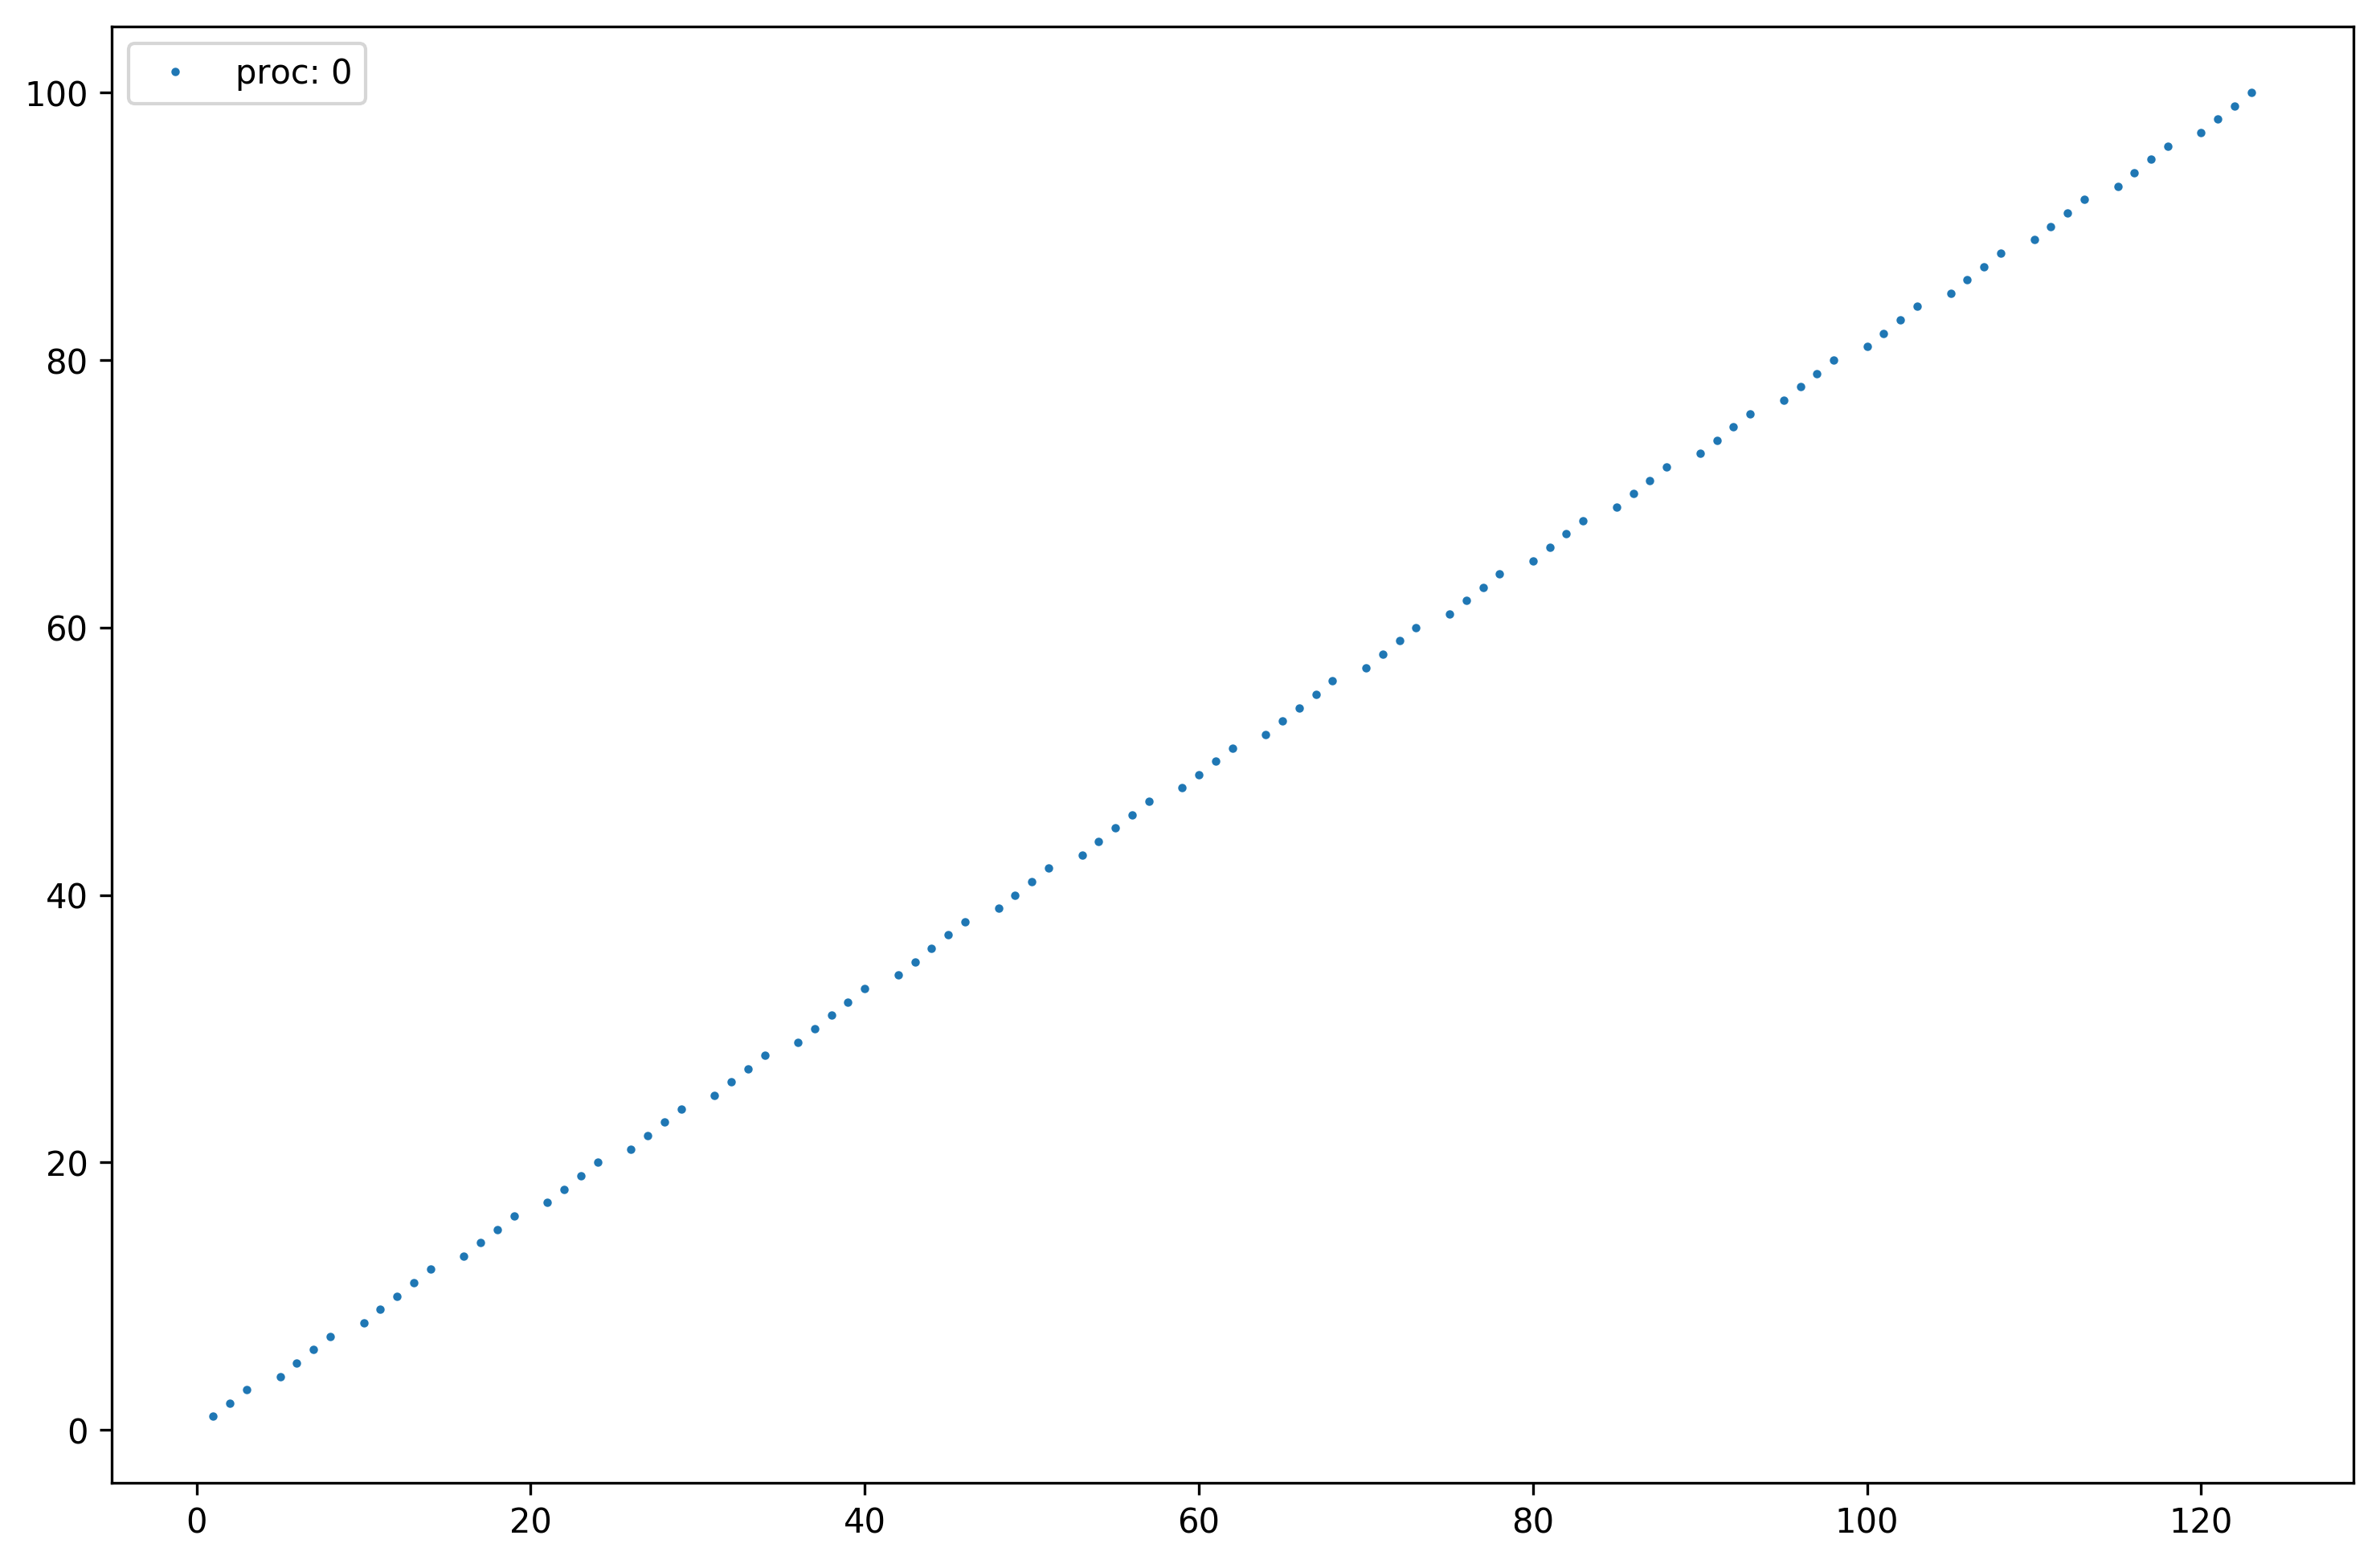

In [16]:
plt.figure(figsize=(12, 8), dpi=300)
plot_table(get_table_by(1,1))

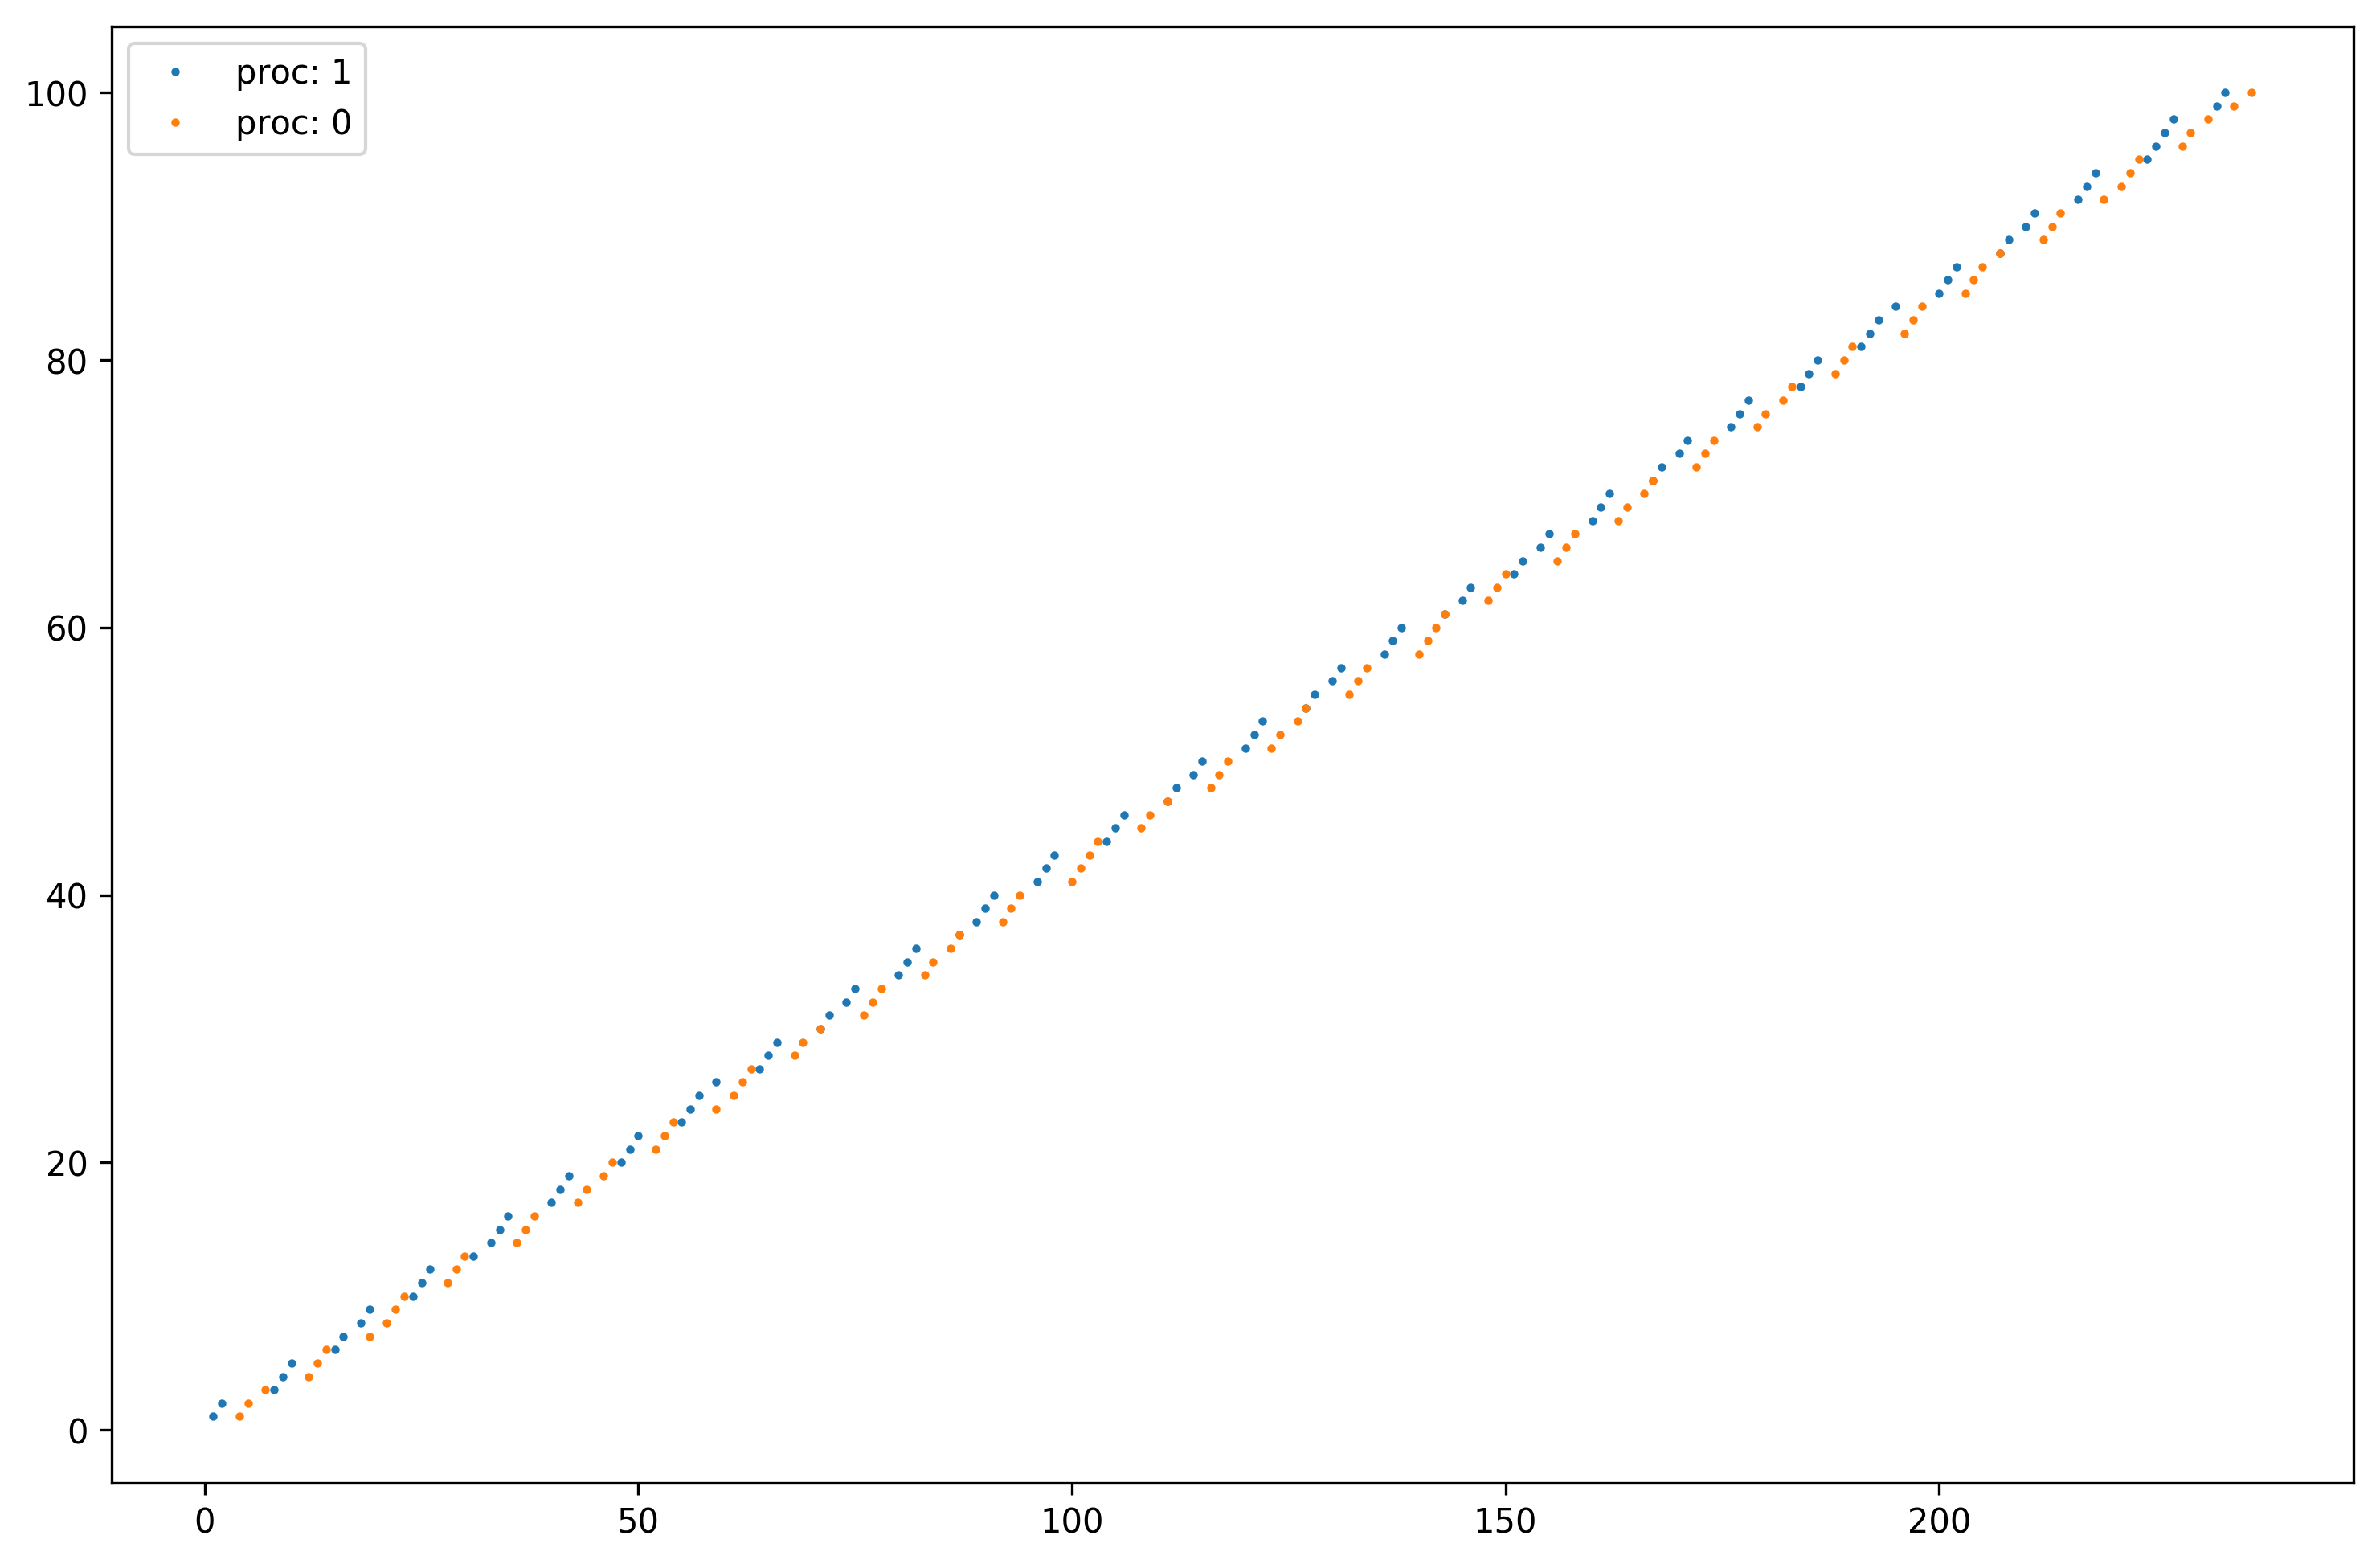

In [17]:
plt.figure(figsize=(12, 8), dpi=300)
plot_table(get_table_by(1,2))

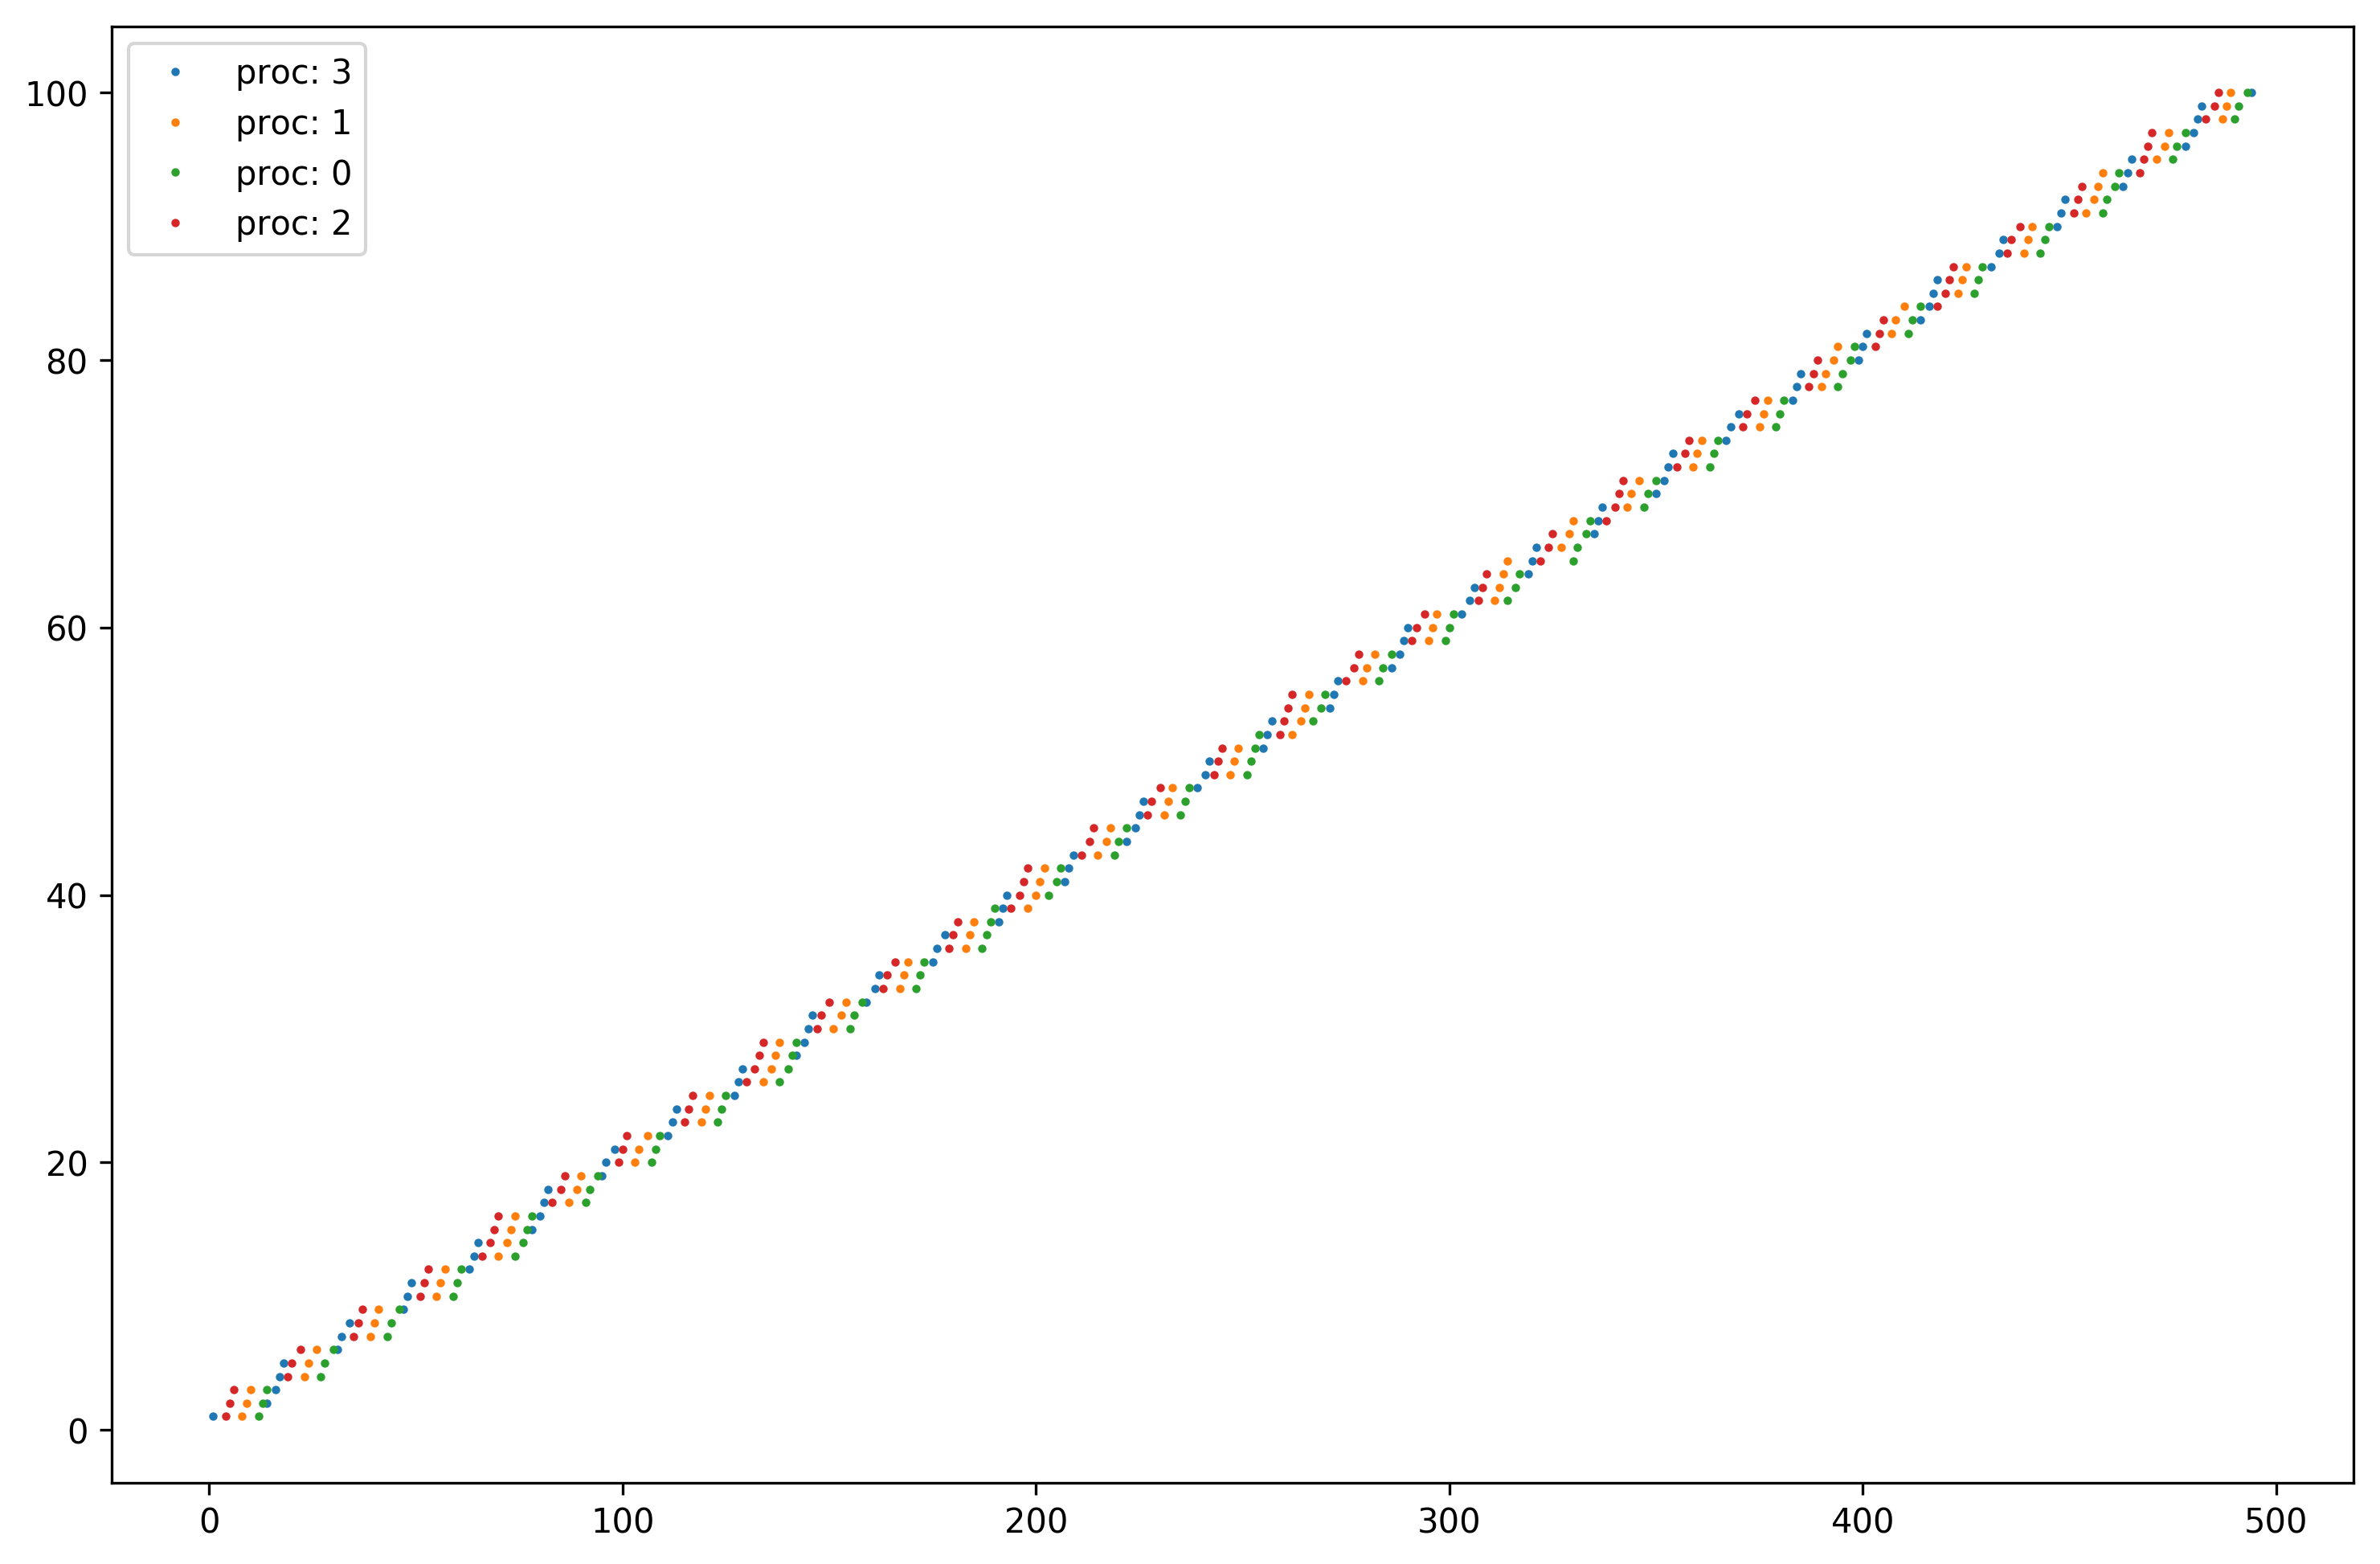

In [19]:
plt.figure(figsize=(12, 8), dpi=300)
plot_table(get_table_by(1,4))

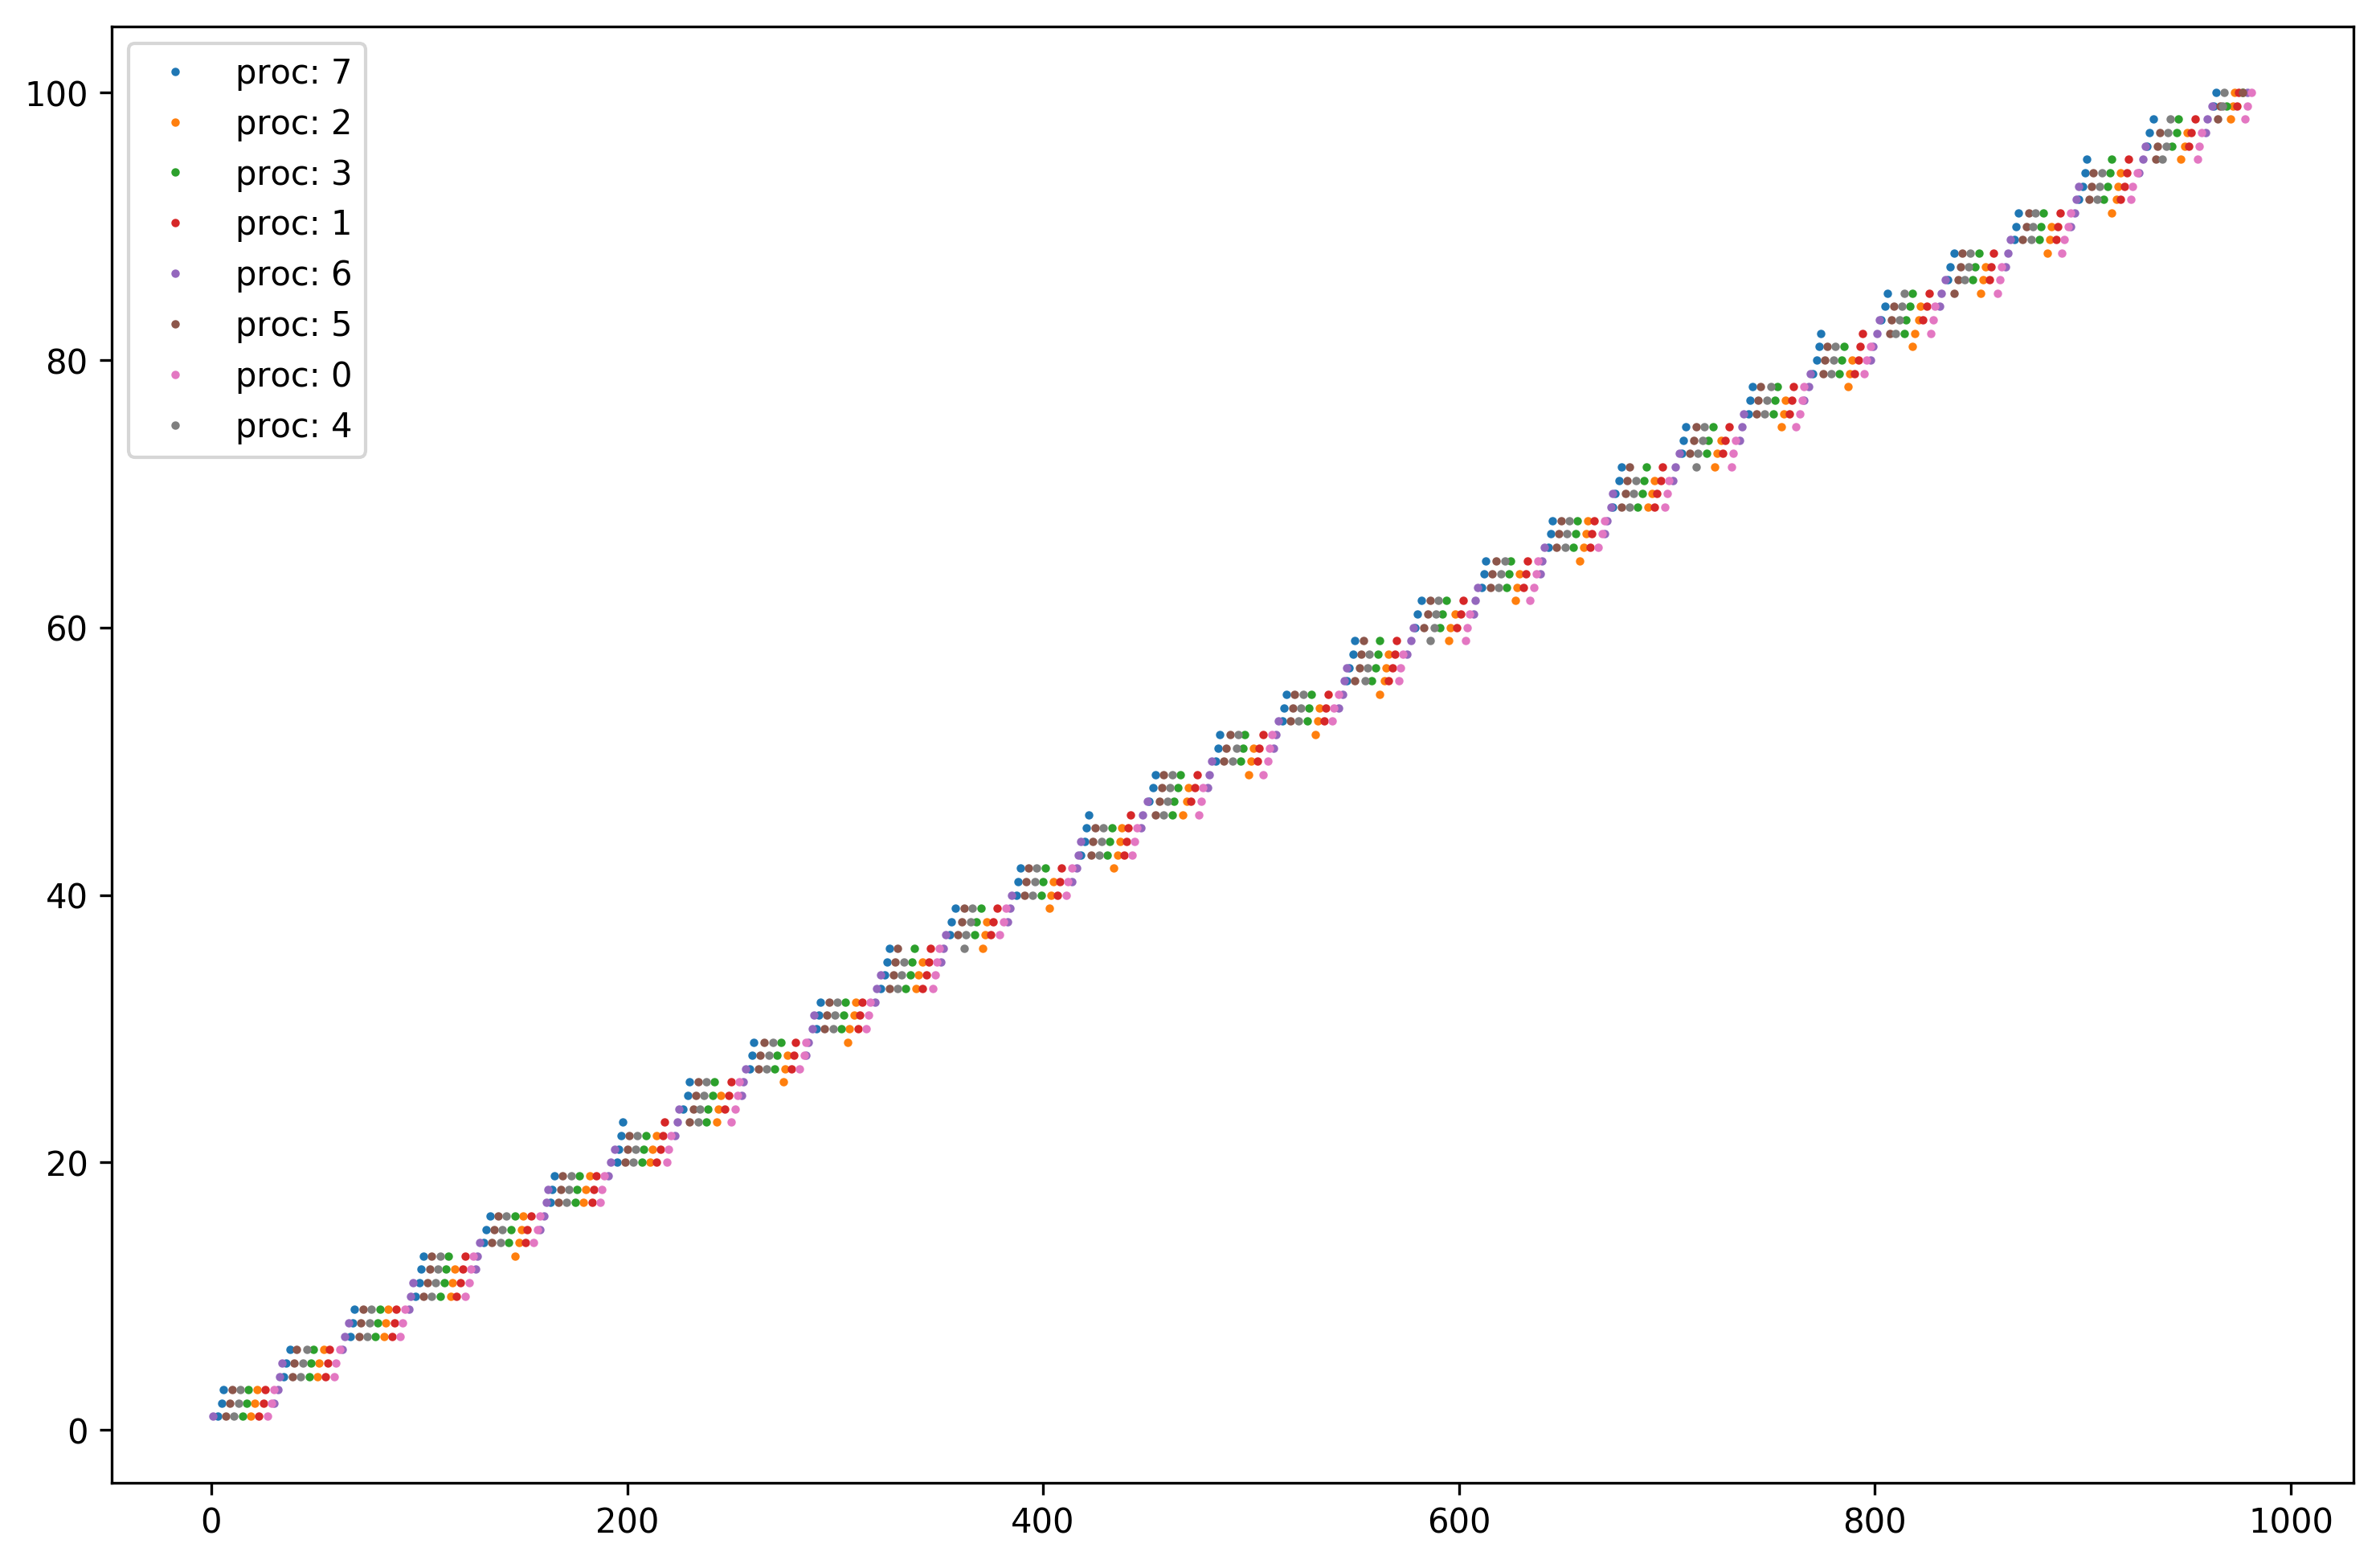

In [20]:
plt.figure(figsize=(12, 8), dpi=300)
plot_table(get_table_by(1,8))

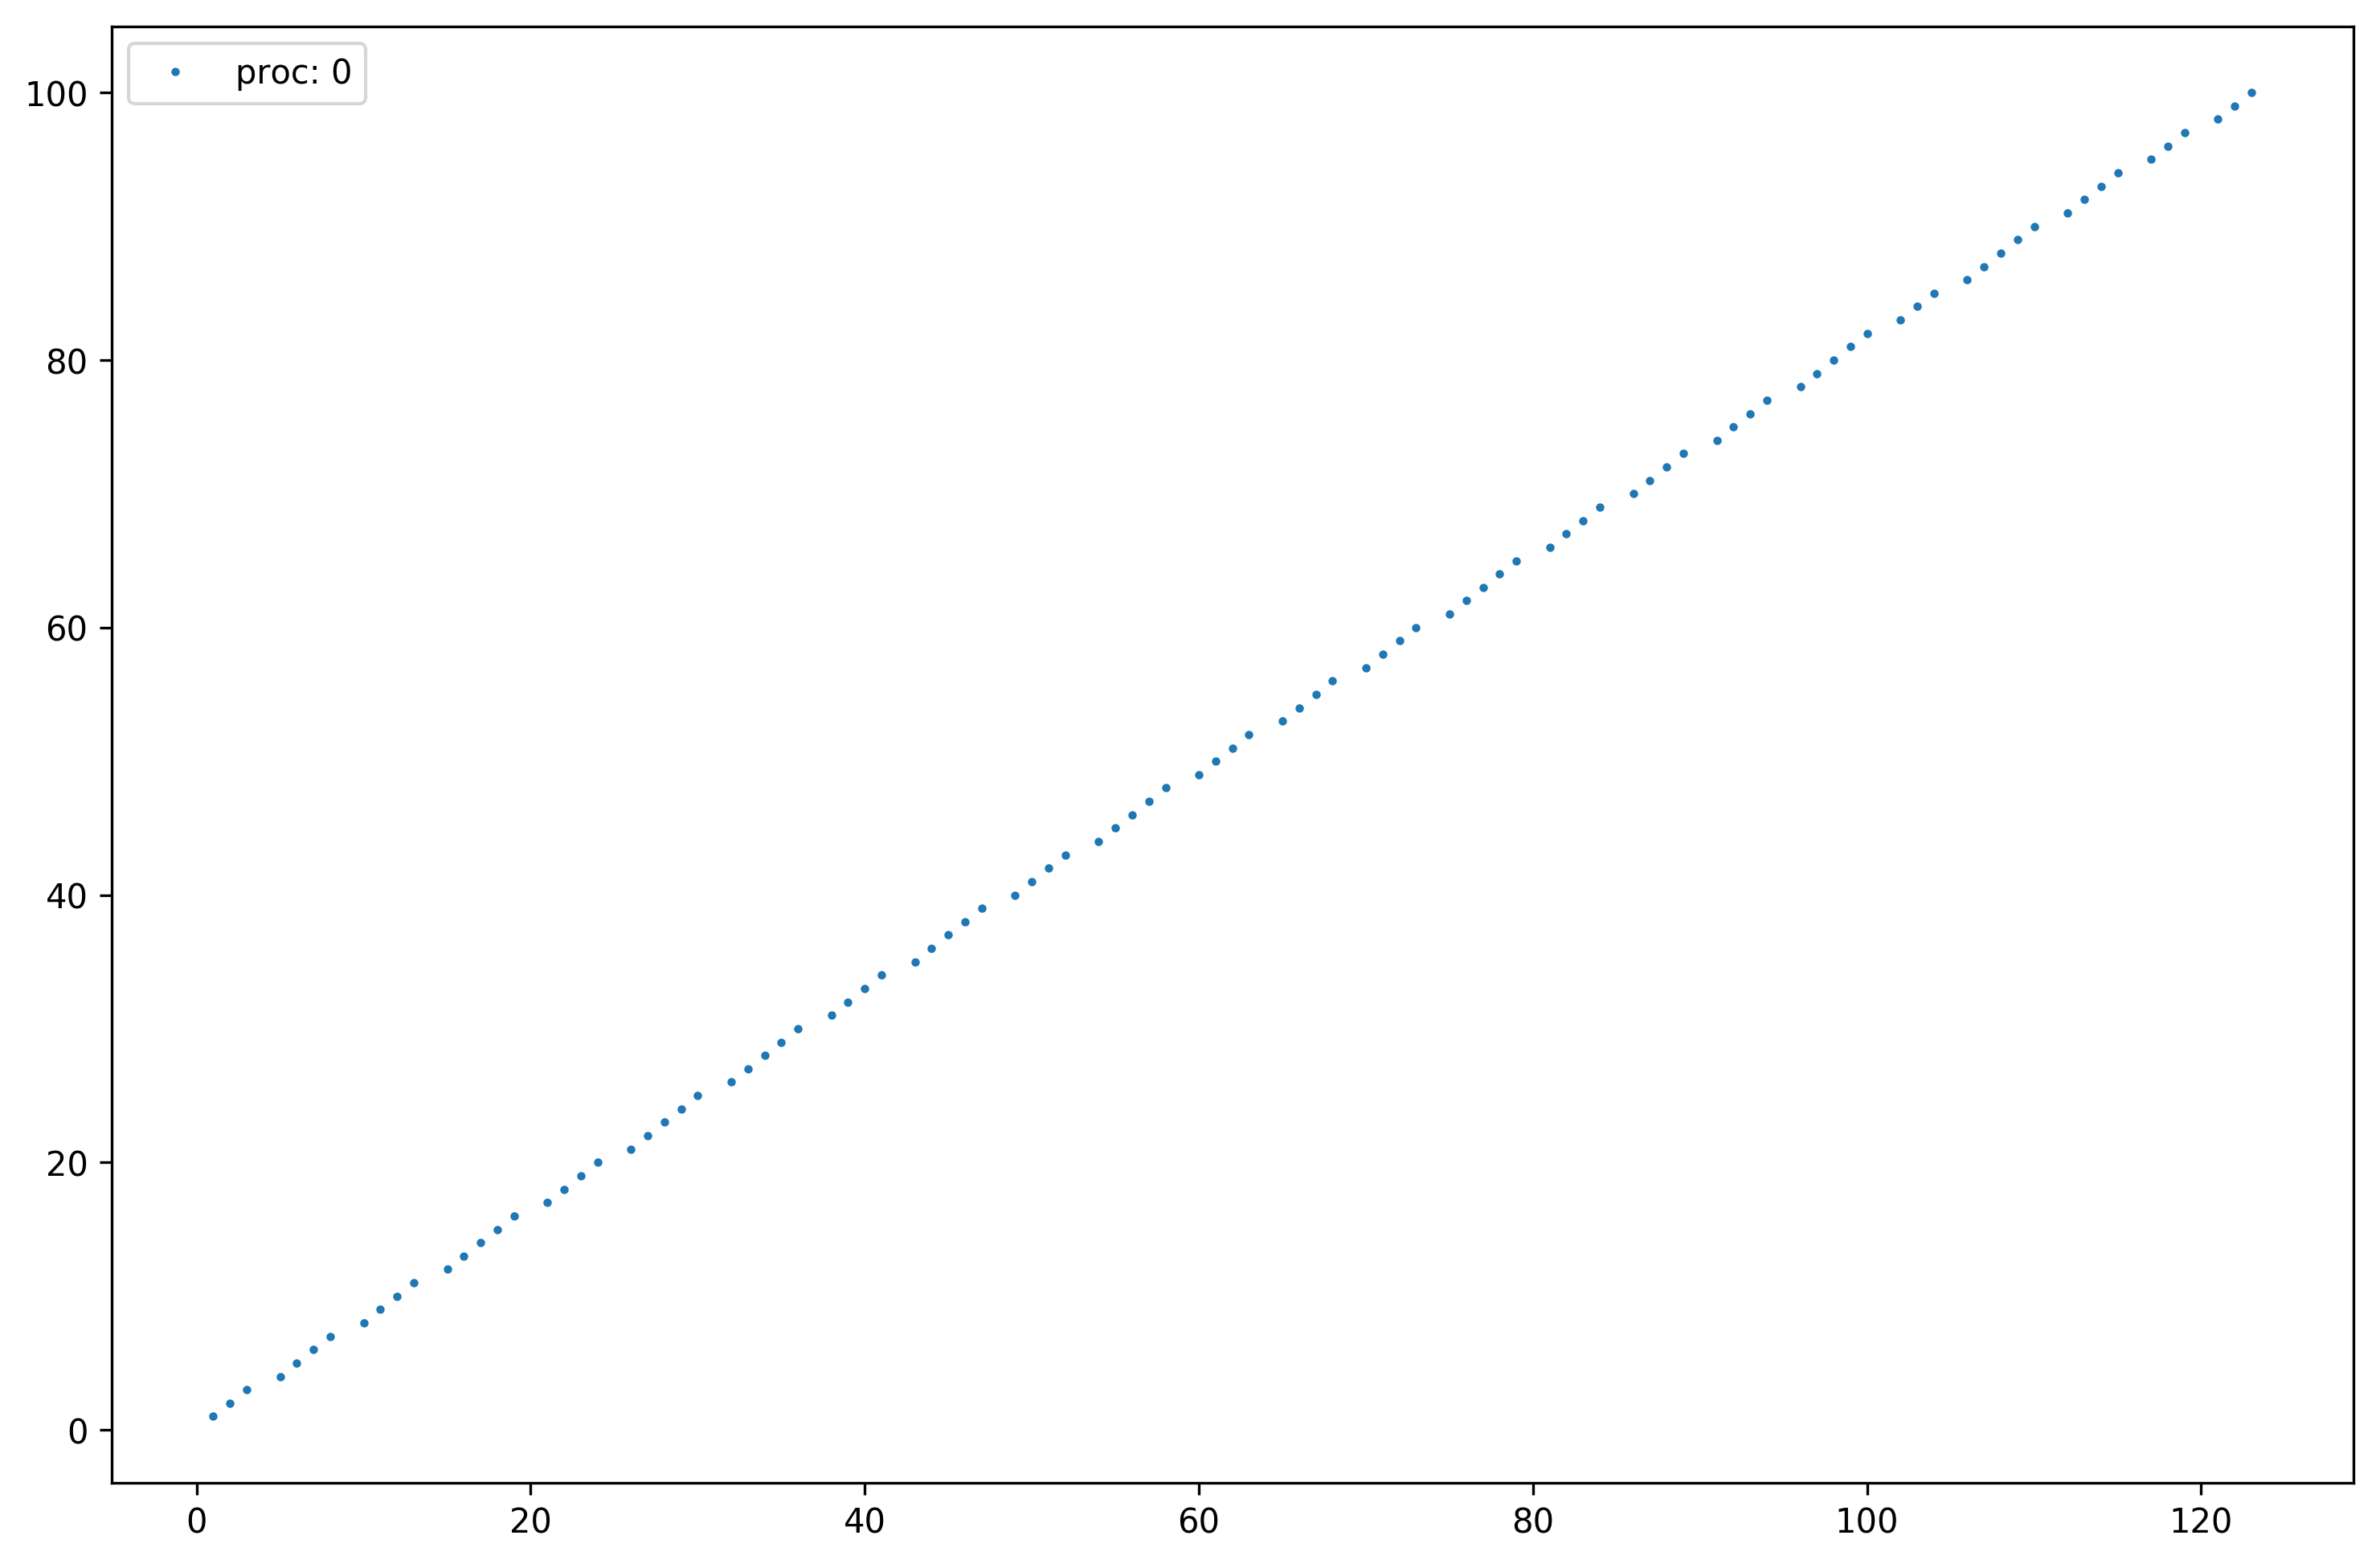

In [21]:
plt.figure(figsize=(12, 8), dpi=300)
plot_table(get_table_by(2,1))

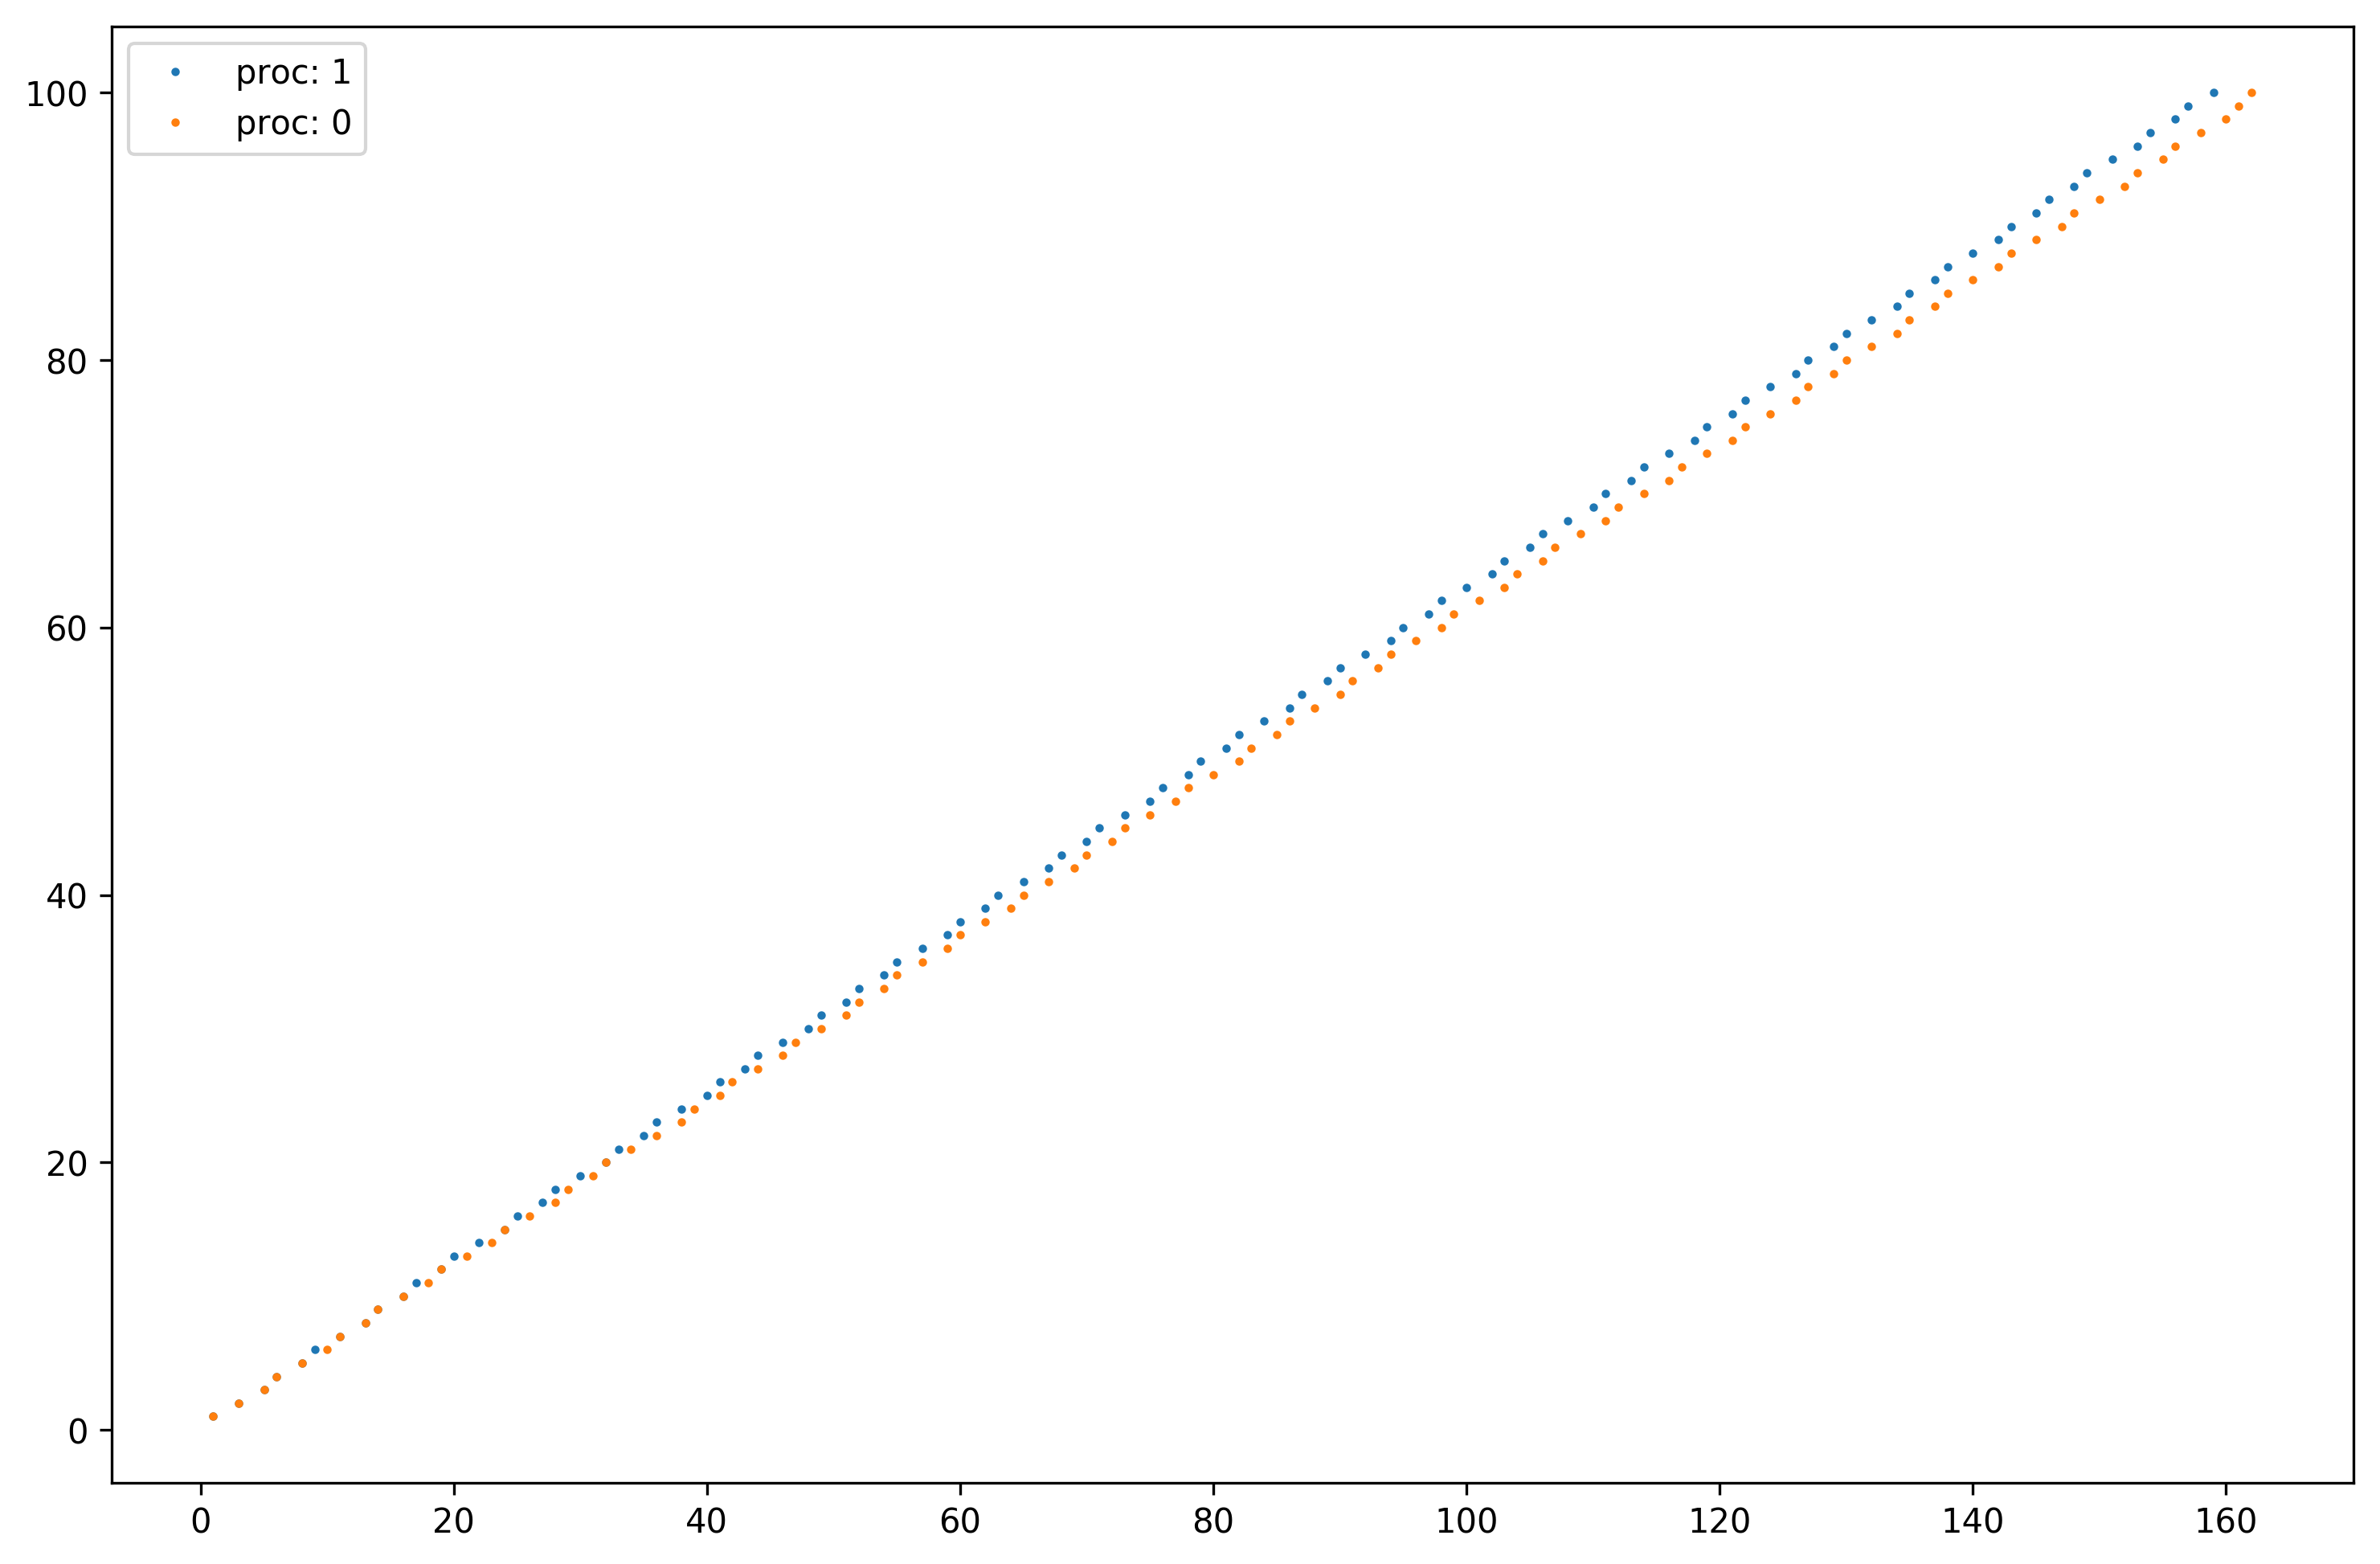

In [22]:
plt.figure(figsize=(12, 8), dpi=300)
plot_table(get_table_by(2,2))

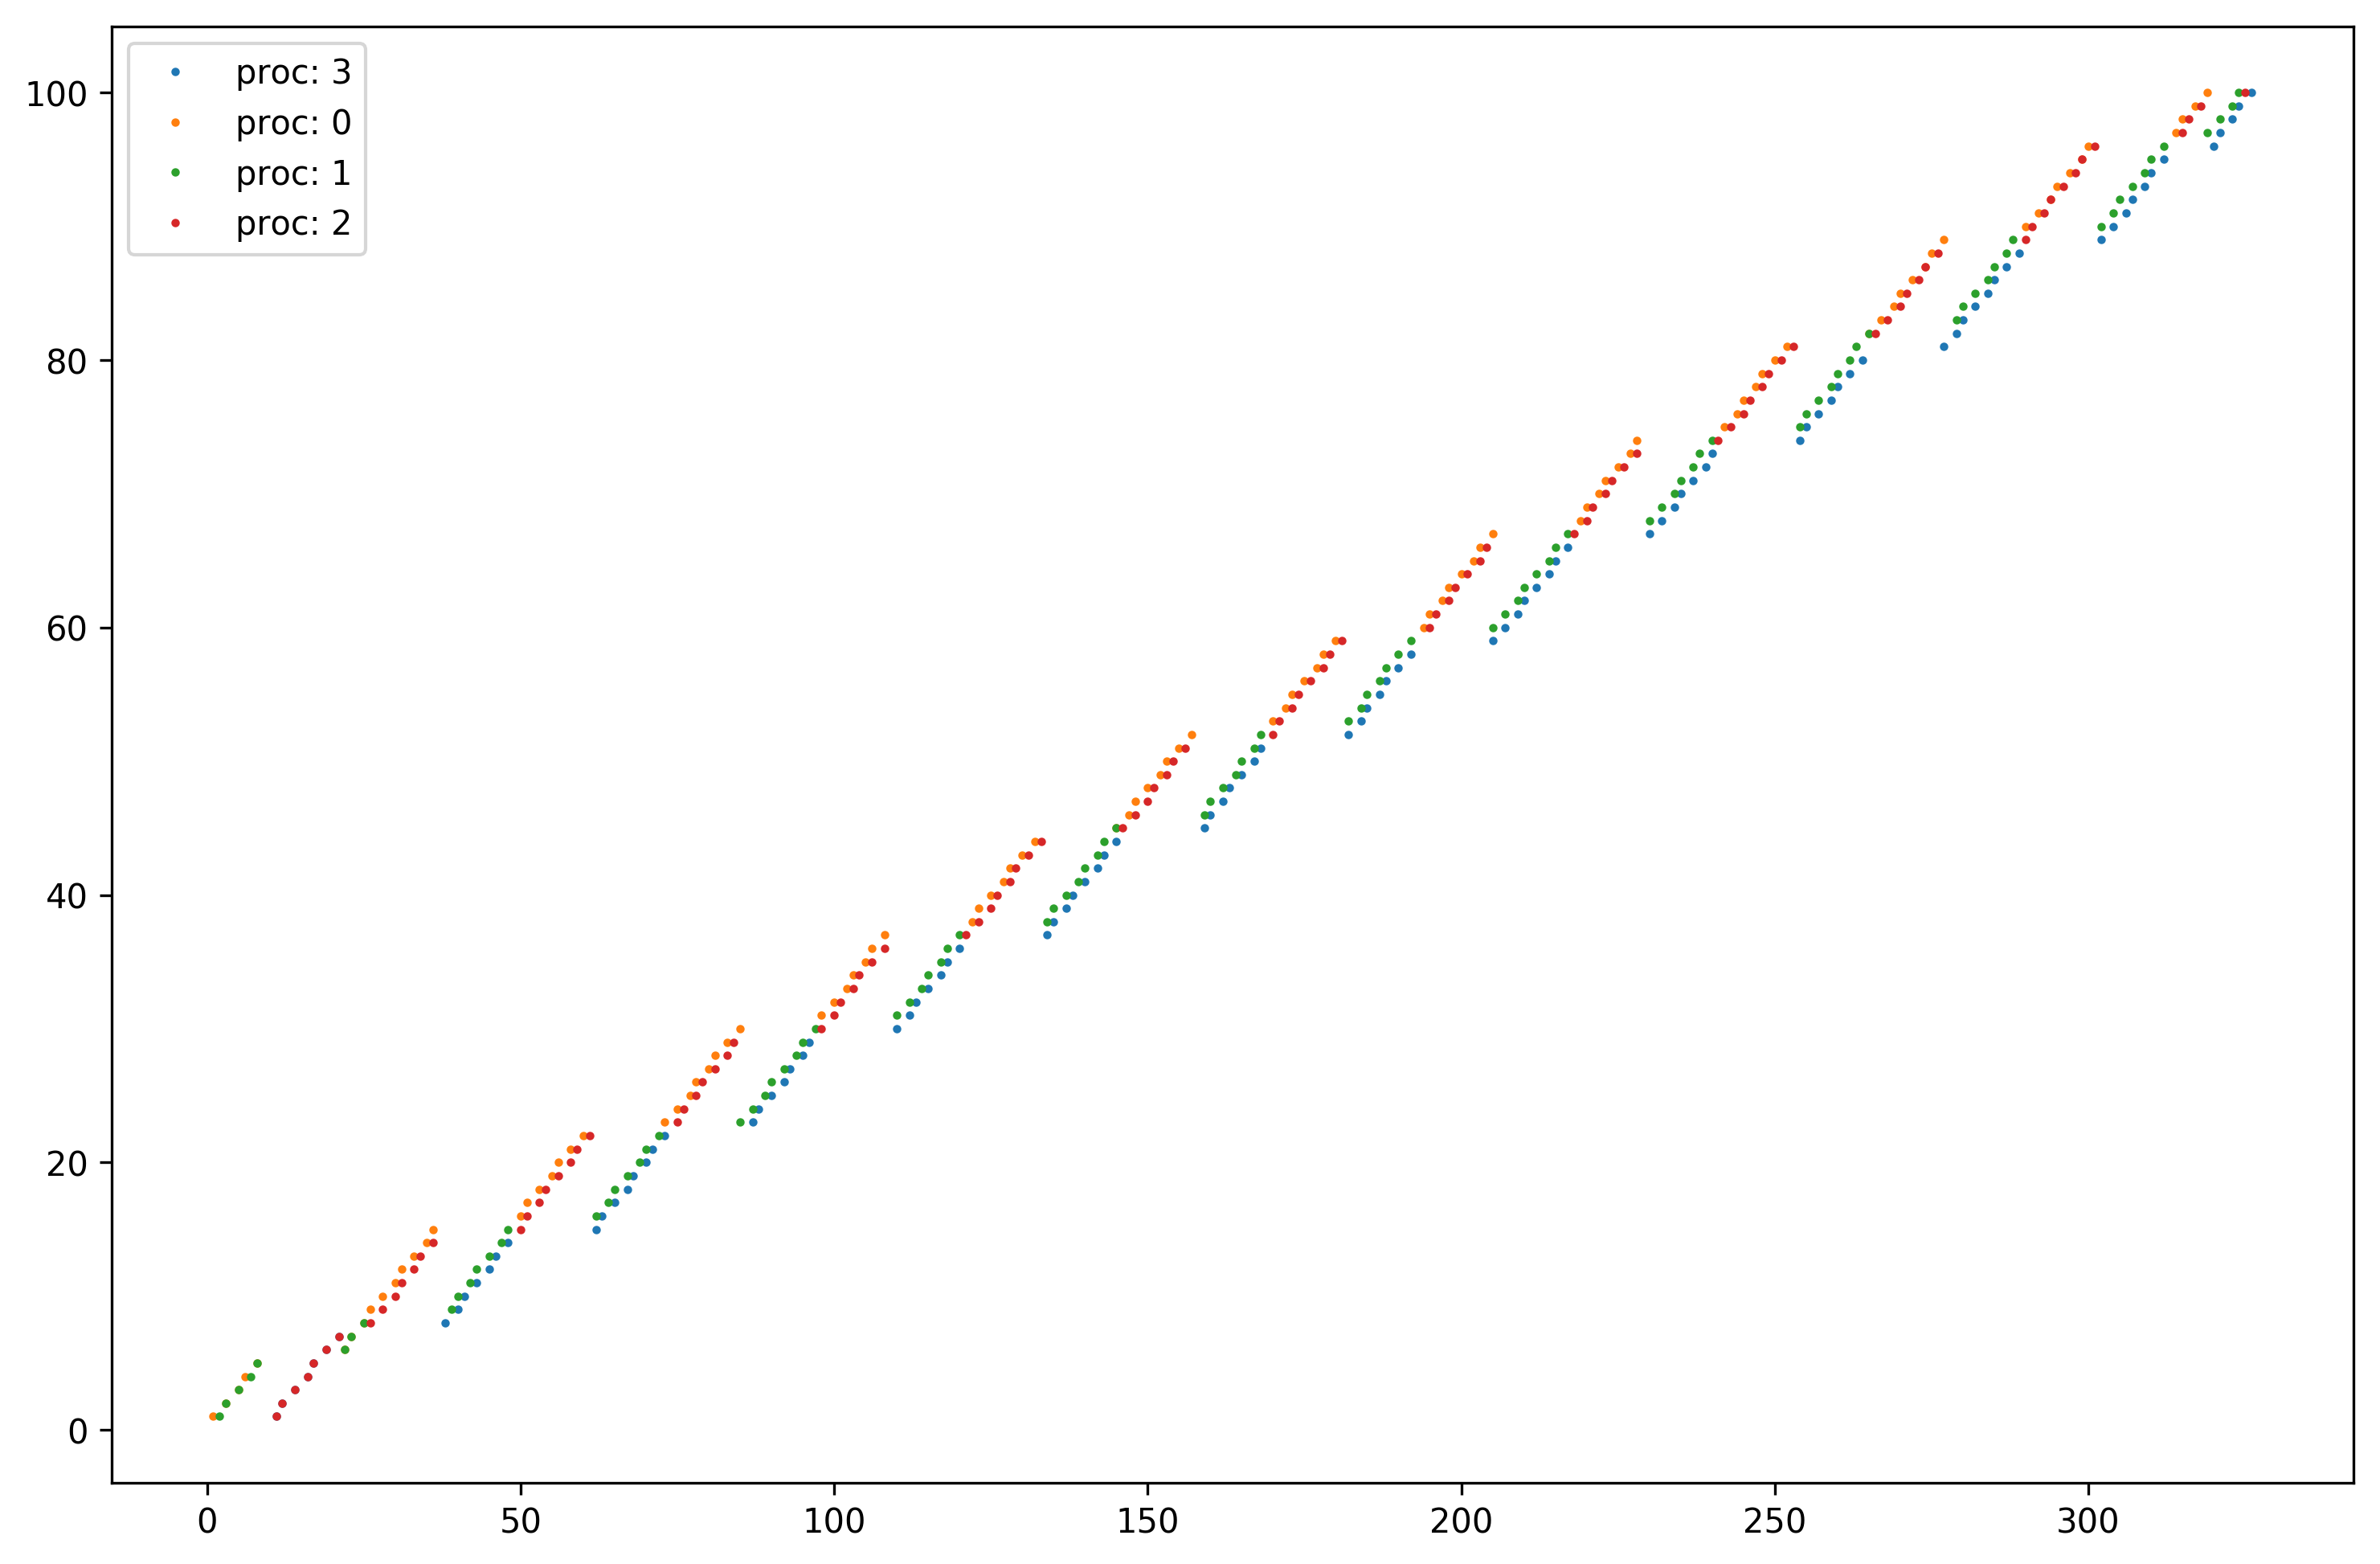

In [23]:
plt.figure(figsize=(12, 8), dpi=300)
plot_table(get_table_by(2,4))

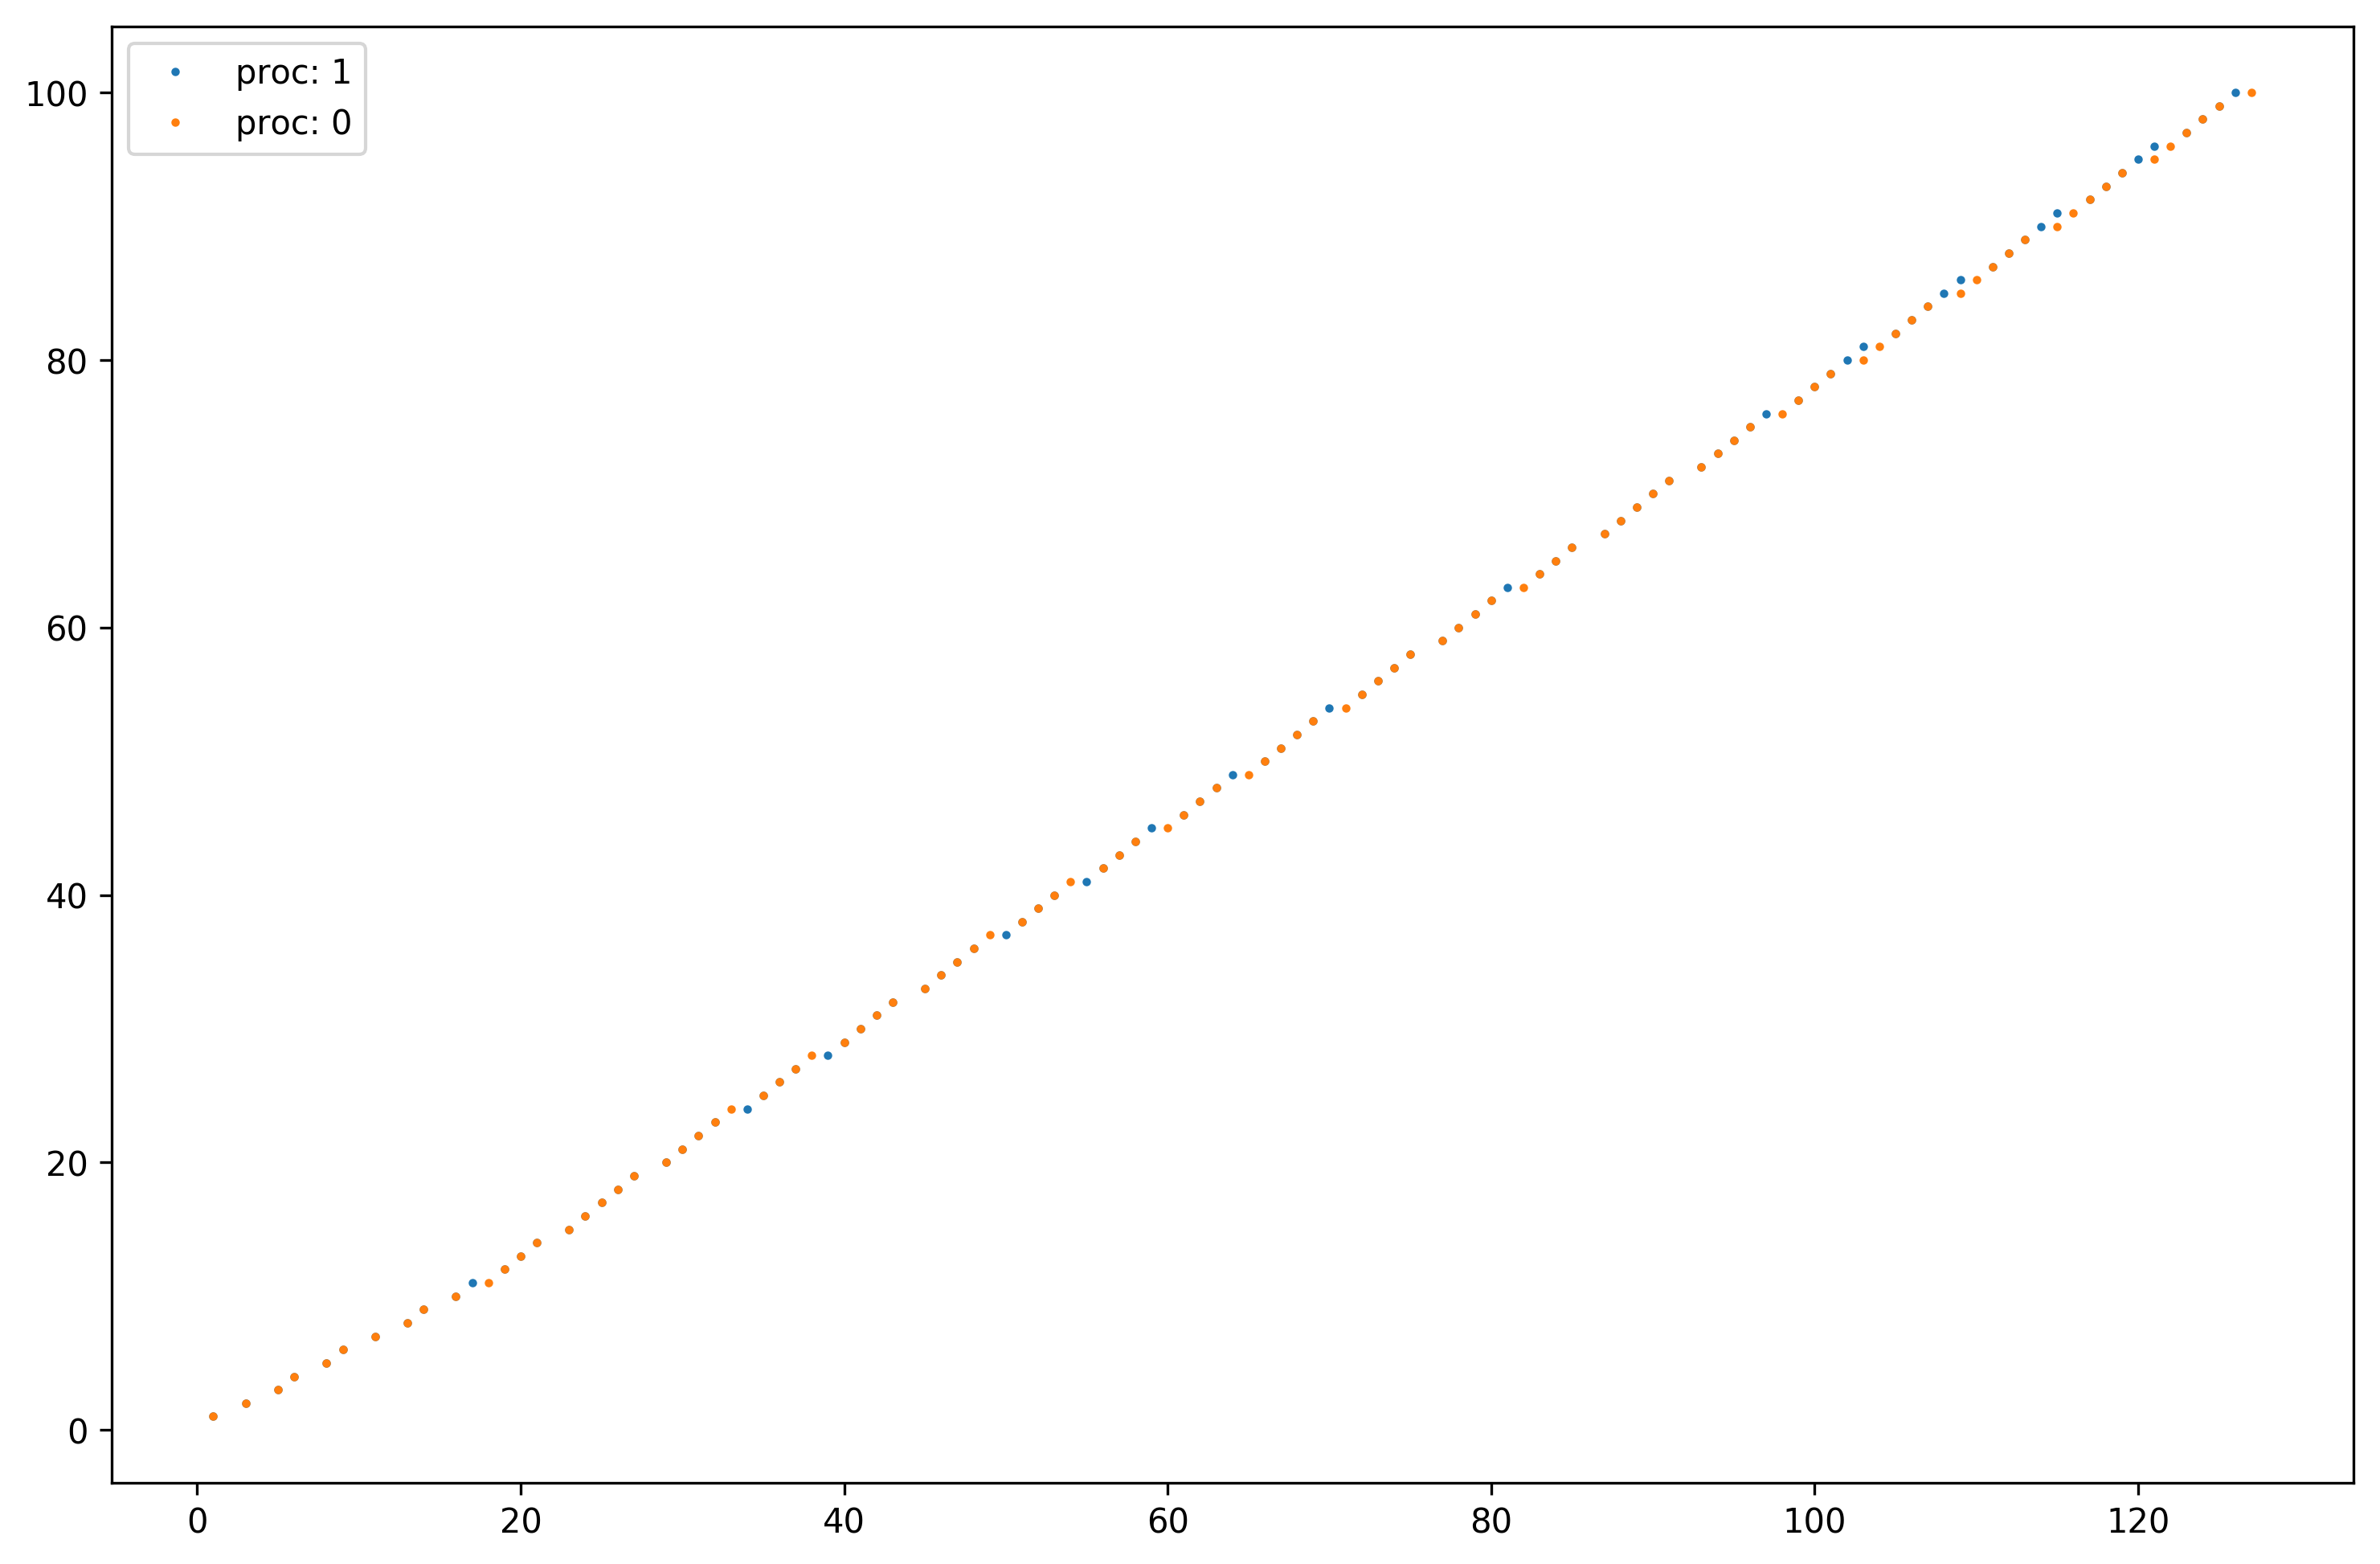

In [29]:
plt.figure(figsize=(12, 8), dpi=300)
plot_table(get_table_by(4,2))

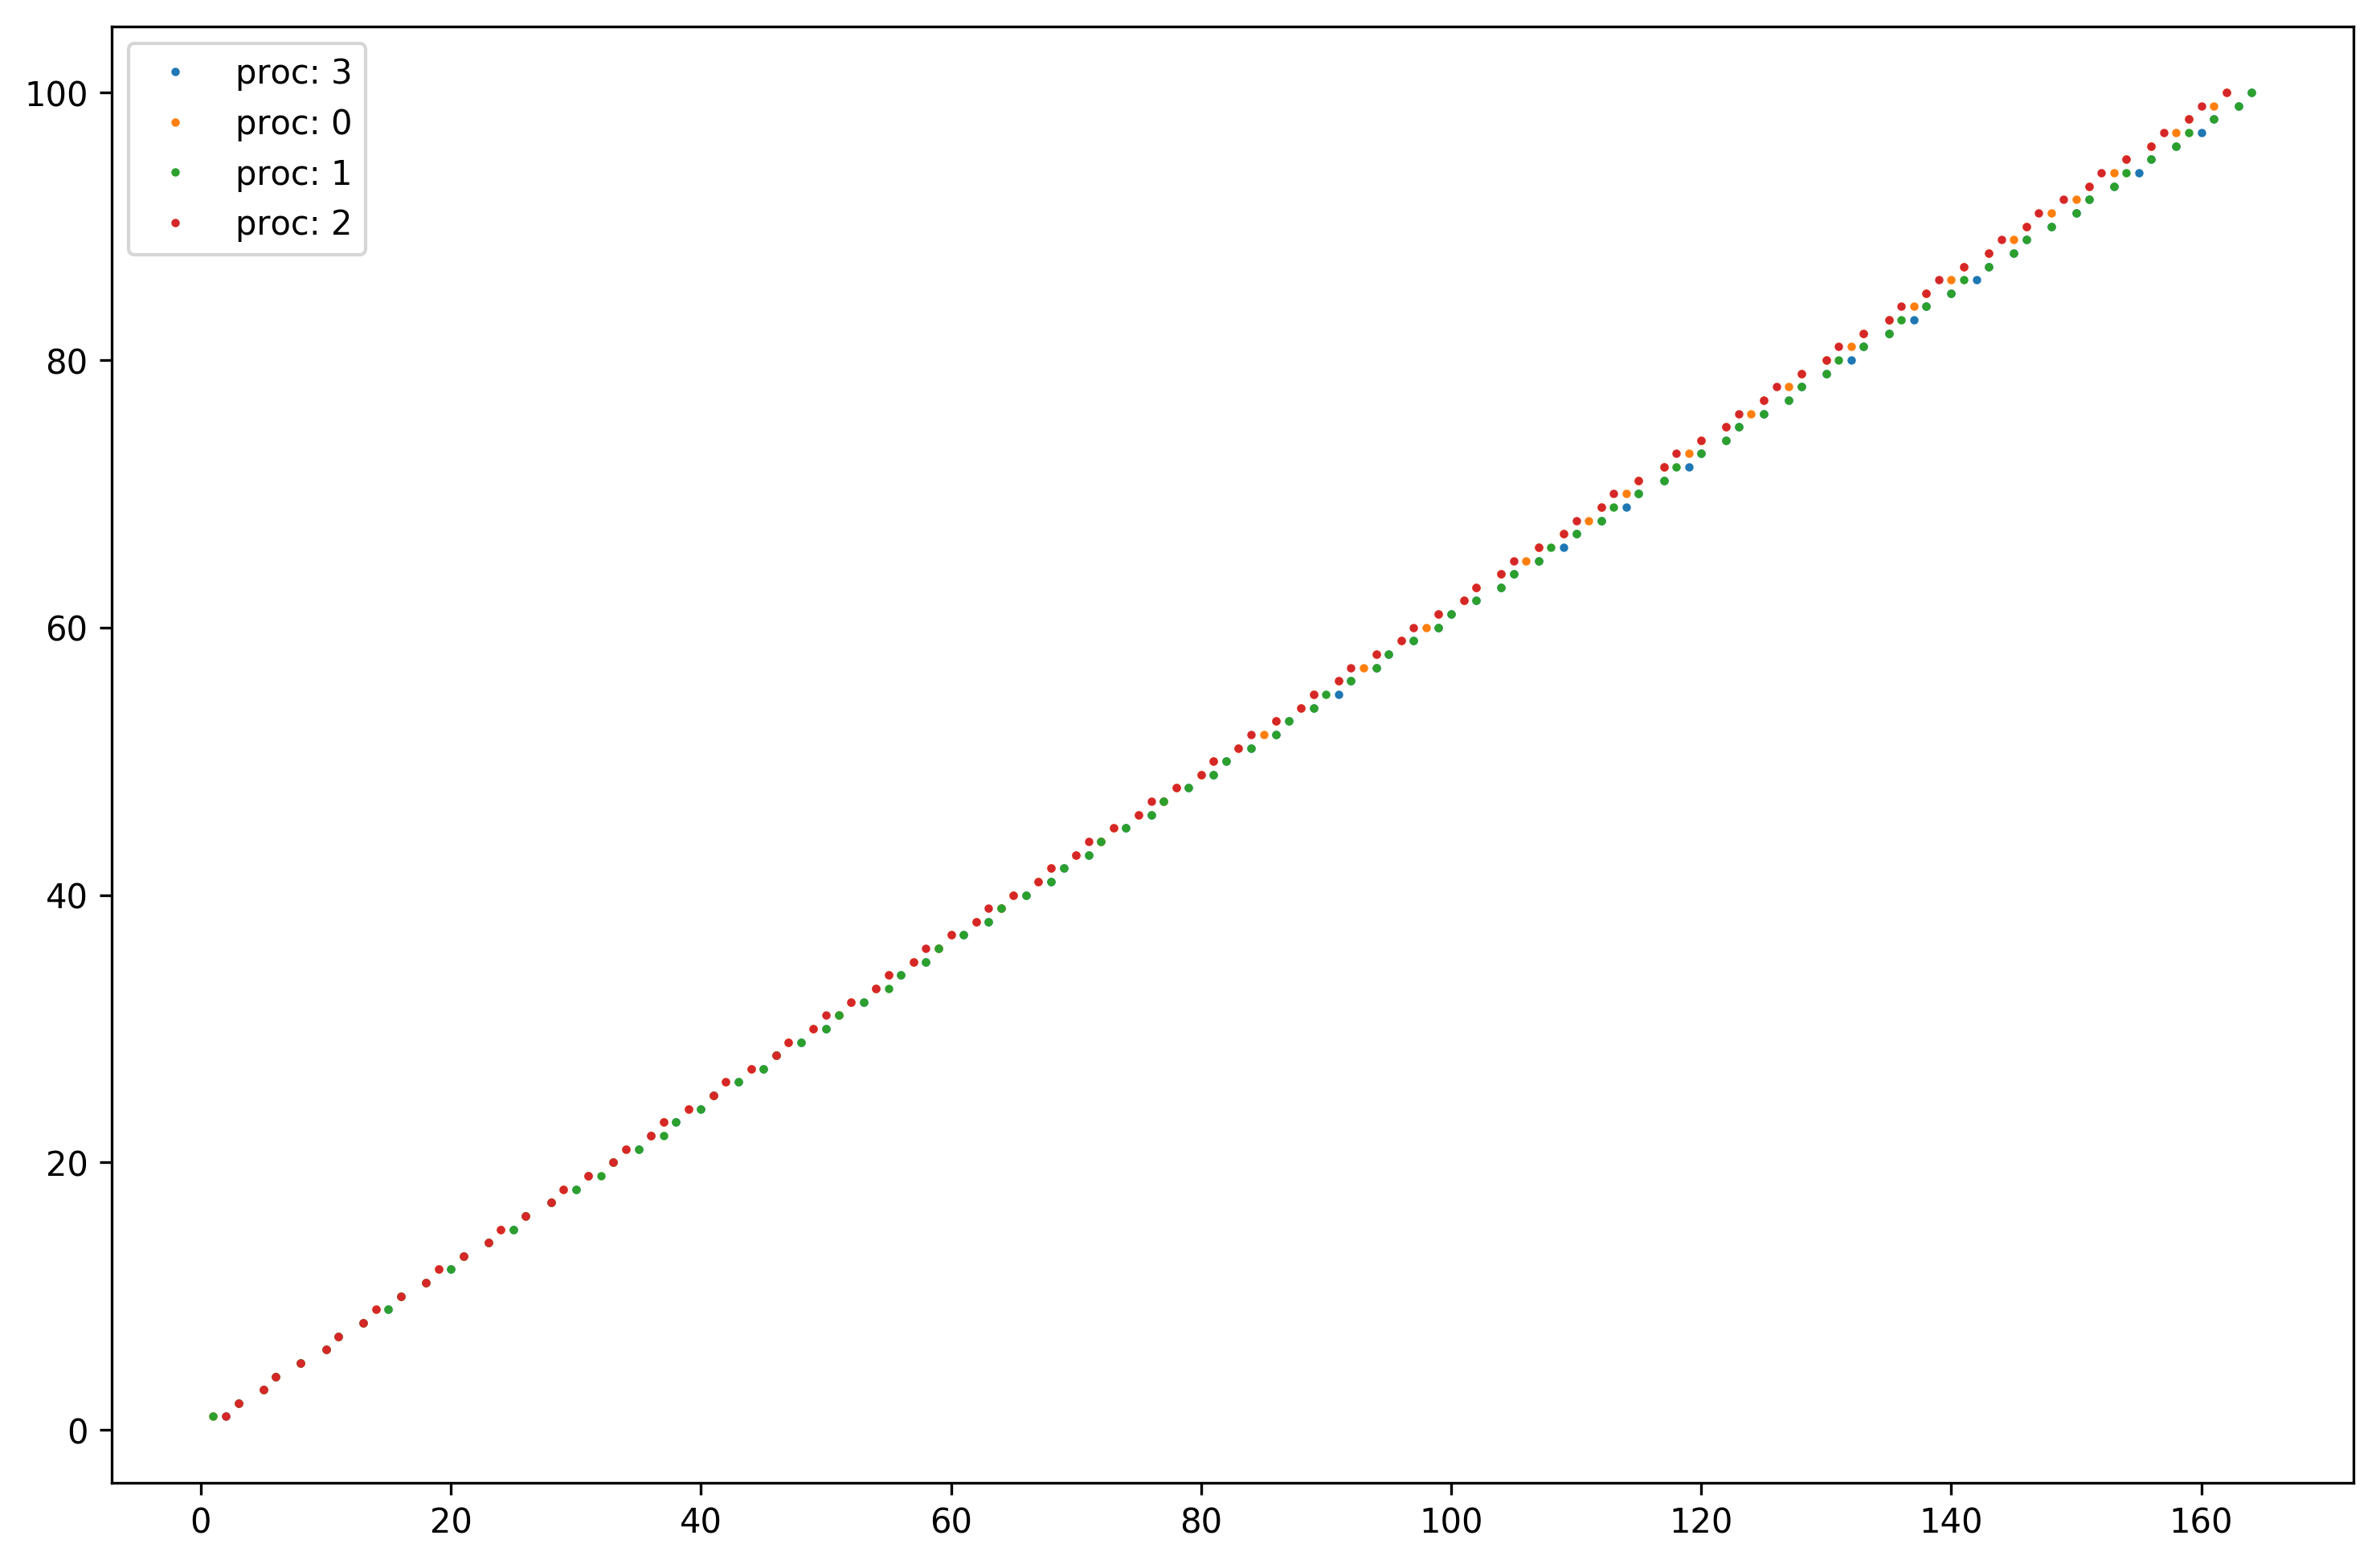

In [24]:
plt.figure(figsize=(12, 8), dpi=300)
plot_table(get_table_by(4,4))

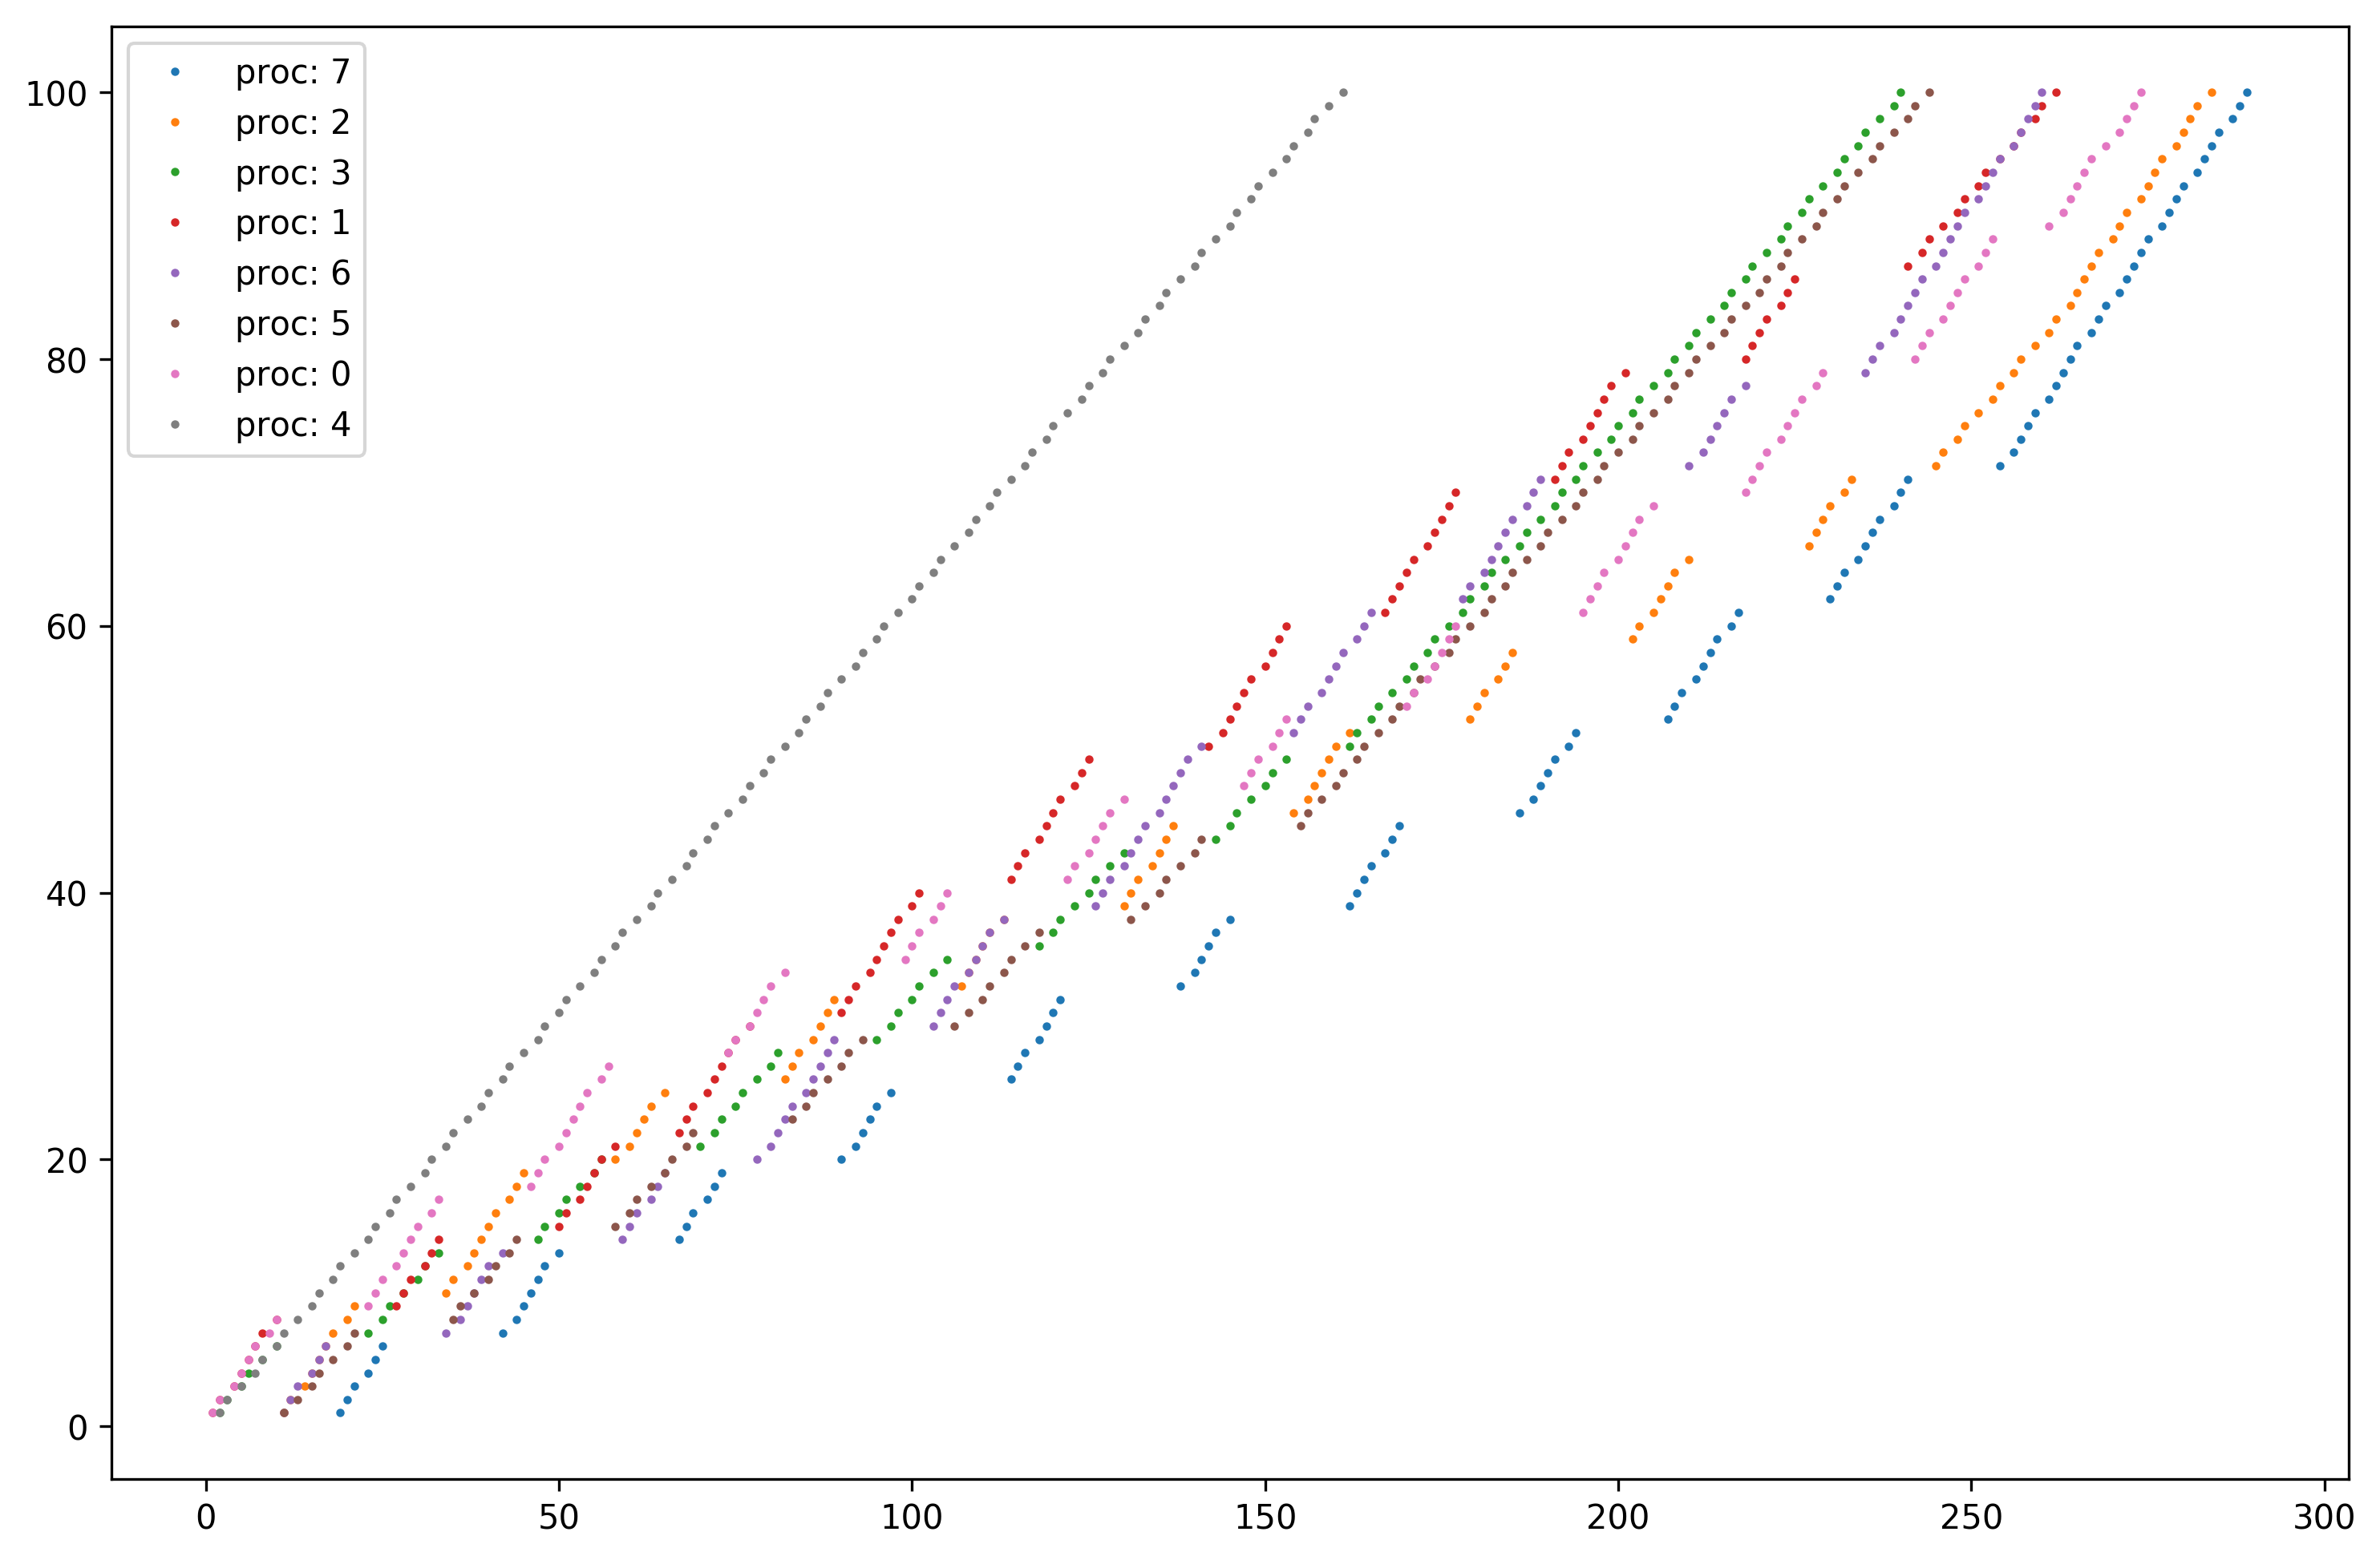

In [25]:
plt.figure(figsize=(12, 8), dpi=300)
plot_table(get_table_by(4, 8))